
### EDA Digital Assignment
###Name : SRISHTI SINHA
###Reg No : 21BDS0120

##MODULE 1: Introduction to Exploratory Data Analysis

In [ ]:
# Srishti Sinha 21BDS0120

#import necessary libraries
import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv('cps91.csv')
print(df.head())

   rownames  husage  husunion  husearns  huseduc  husblck  hushisp  hushrs  \
0         1      42       0.0       568       14        0        0      40   
1         2      26       0.0       600       14        0        0       0   
2         3      56       0.0      1500       14        0        0      40   
3         4      35       NaN         0       12        0        0      40   
4         5      42       0.0       450       11        0        0      45   

   kidge6  earns  ...  faminc  husexp  exper  kidlt6  hours  expersq  \
0       1  290.0  ...   45000      22     23       0      0      529   
1       0  654.0  ...   45000       6      6       0      0       36   
2       1  100.0  ...   55000      36     31       0     15      961   
3       0    0.0  ...   55000      17     19       1      0      361   
4       1    0.0  ...   27500      25     24       0      0      576   

    nwifeinc  inlf    hrwage    lwage  
0  29.920000     0       NaN      NaN  
1  10.992000     0

In [ ]:
# Srishti Sinha 21BDS0120

# Dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

# Summary statistics for all columns
print("\nSummary Statistics:\n", df.describe(include='all'))

# Sum of missing values in each column
print("\nMissing Values:\n", df.isnull().sum())

# Data types of each column
print("\nData Types:\n", df.dtypes)

Dimensions of the dataset: (5634, 25)

Summary Statistics:
           rownames       husage     husunion     husearns      huseduc  \
count  5634.000000  5634.000000  4148.000000  5634.000000  5634.000000   
mean   2817.500000    42.452964     0.232401   453.540646    13.147675   
std    1626.540039    11.228167     0.422414   406.987817     2.977194   
min       1.000000    19.000000     0.000000     0.000000     0.000000   
25%    1409.250000    34.000000     0.000000     0.000000    12.000000   
50%    2817.500000    41.000000     0.000000   418.500000    12.000000   
75%    4225.750000    50.000000     0.000000   675.000000    16.000000   
max    5634.000000    86.000000     1.000000  1923.000000    18.000000   

           husblck      hushisp       hushrs       kidge6        earns  ...  \
count  5634.000000  5634.000000  5634.000000  5634.000000  5634.000000  ...   
mean      0.059460     0.066205    37.883387     0.307597   232.832978  ...   
std       0.236505     0.248662    1

##MODULE 2: Data Transformation

**(1) Data Deduplication**: identifying and removing duplicates from the dataset

In [ ]:
# Srishti Sinha 21BDS0120

# Original data size
original_size = df.shape[0]

# Remove duplicate rows
df = df.drop_duplicates()

# New data size after removing duplicates
new_size = df.shape[0]
print(f"Number of rows before deduplication: {original_size}")
print(f"Number of rows after deduplication: {new_size}")

Number of rows before deduplication: 5634
Number of rows after deduplication: 5634


**(2) Discretization and Binning**: Convert continuous variables into categorical ones by binning.

In [ ]:
# Srishti Sinha 21BDS0120

# Discretizing husage into age groups
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '>60']
df['husage_group'] = pd.cut(df['husage'], bins=bins, labels=labels)

# Display the first few rows to see the new column
print(df[['husage', 'husage_group']])

      husage husage_group
0         42        35-45
1         26        25-35
2         56        45-60
3         35        25-35
4         42        35-45
...      ...          ...
5629      30        25-35
5630      30        25-35
5631      57        45-60
5632      52        45-60
5633      47        45-60

[5634 rows x 2 columns]


**(3) Handling missing data**: imputing missing values using traditional methods

In [ ]:
# Srishti Sinha 21BDS0120

# Identifying columns with missing data
missing_data = df.isnull().sum()
print("Columns with missing data and their counts:")
print(missing_data[missing_data > 0])

Columns with missing data and their counts:
husunion    1486
union       2076
hrwage      2348
lwage       2348
dtype: int64


In [ ]:
# Srishti Sinha 21BDS0120

# Replace missing values in numeric columns with mean
df['hrwage'].fillna(df['hrwage'].mean(), inplace=True)
df['lwage'].fillna(df['lwage'].mean(), inplace=True)

# Replace missing values in categorical column husunion with mode
df['husunion'].fillna(df['husunion'].mode()[0], inplace=True)

# Check for missing values again to confirm handling
missing_data_after = df.isnull().sum()
print("Columns with missing data after handling:")
print(missing_data_after[missing_data_after > 0])

Columns with missing data after handling:
union    2076
dtype: int64


<ipython-input-12-b9005e1d3532>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hrwage'].fillna(df['hrwage'].mean(), inplace=True)
<ipython-input-12-b9005e1d3532>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

## MODULE 3: Correlation and Time Series Analysis

**Univariate Analysis**: Exploring distributions and statistics for individual columns


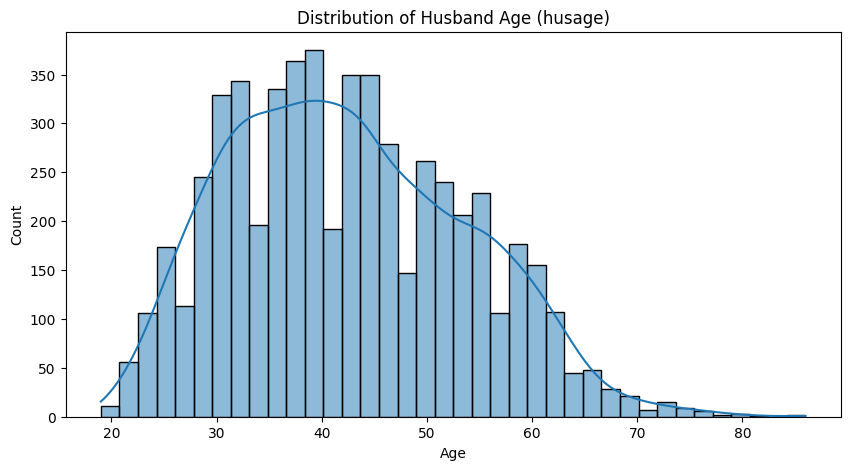

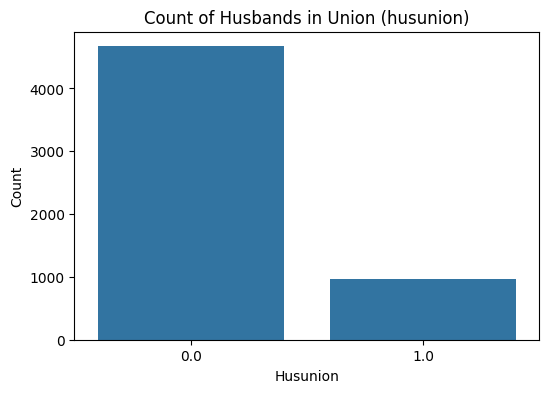

In [ ]:
# Srishti Sinha 21BDS0120

import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis of a continuous variable, e.g., 'husage'
plt.figure(figsize=(10, 5))
sns.histplot(df['husage'], kde=True)
plt.title('Distribution of Husband Age (husage)')
plt.xlabel('Age')
plt.show()

# Univariate Analysis for a categorical variable, e.g., 'husunion'
plt.figure(figsize=(6, 4))
sns.countplot(x='husunion', data=df)
plt.title('Count of Husbands in Union (husunion)')
plt.xlabel('Husunion')
plt.ylabel('Count')
plt.show()

**Bivariate Analysis**: Exploring relationships between two variables.

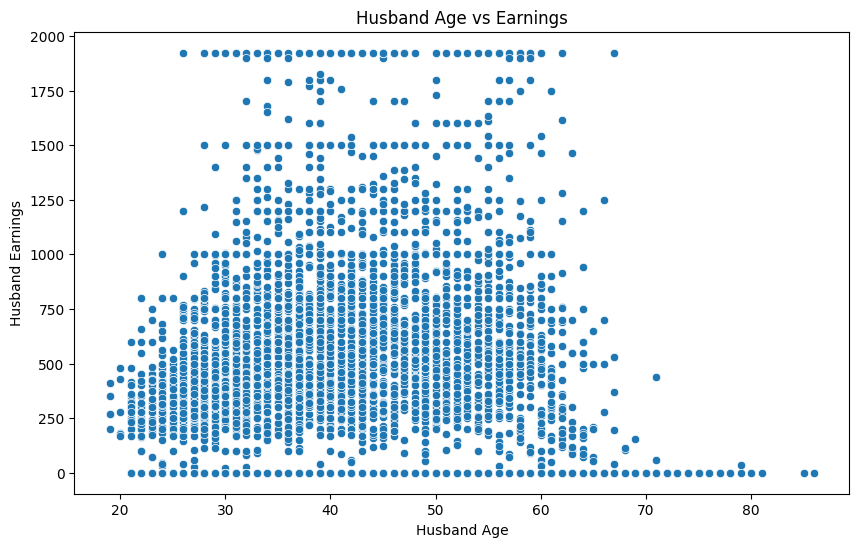

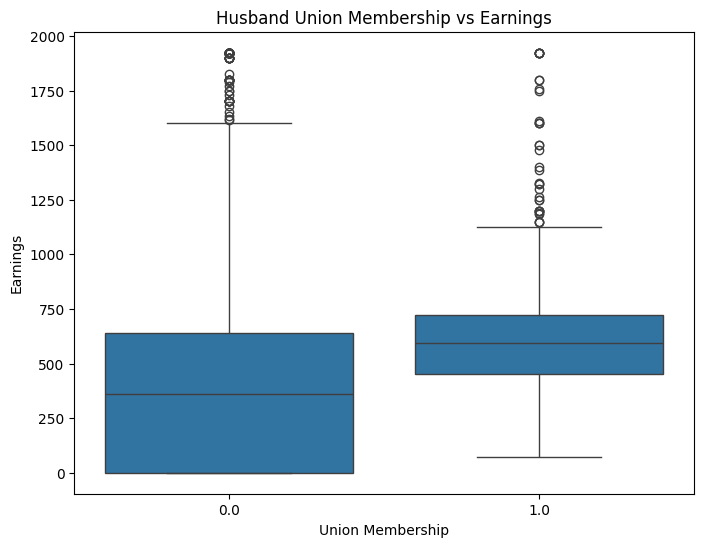

In [ ]:
# Srishti Sinha 21BDS0120

# Bivariate Analysis between 'husage' and 'husearns'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='husage', y='husearns', data=df)
plt.title('Husband Age vs Earnings')
plt.xlabel('Husband Age')
plt.ylabel('Husband Earnings')
plt.show()

# Bivariate Analysis using box plot for categorical and continuous variable, e.g., 'husunion' and 'husearns'
plt.figure(figsize=(8, 6))
sns.boxplot(x='husunion', y='husearns', data=df)
plt.title('Husband Union Membership vs Earnings')
plt.xlabel('Union Membership')
plt.ylabel('Earnings')
plt.show()

**Multivariate Analysis**: Exploring relationships involving multiple variables using pair plots or correlation matrices.

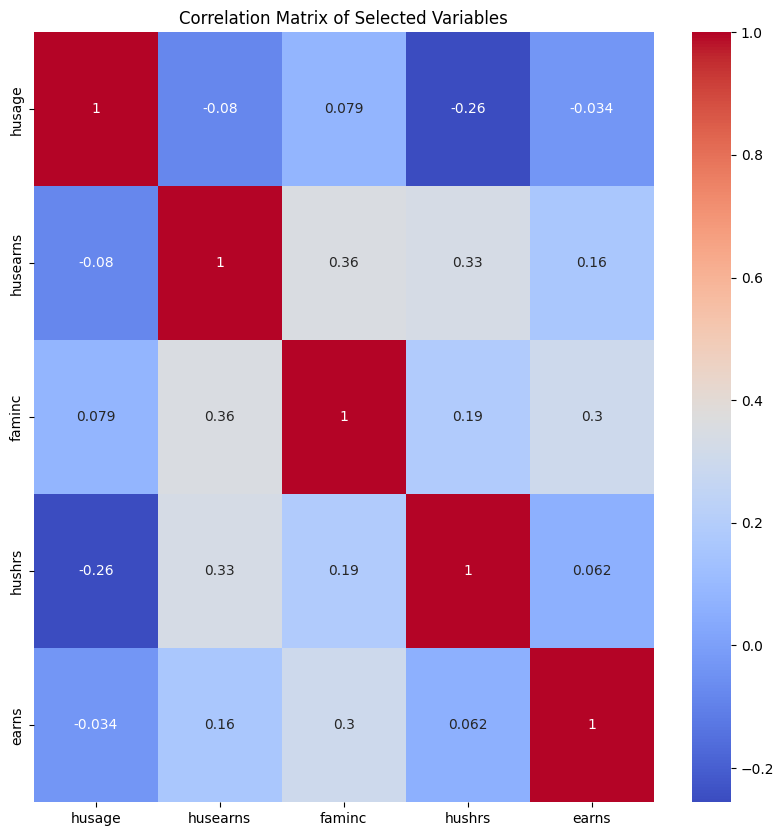

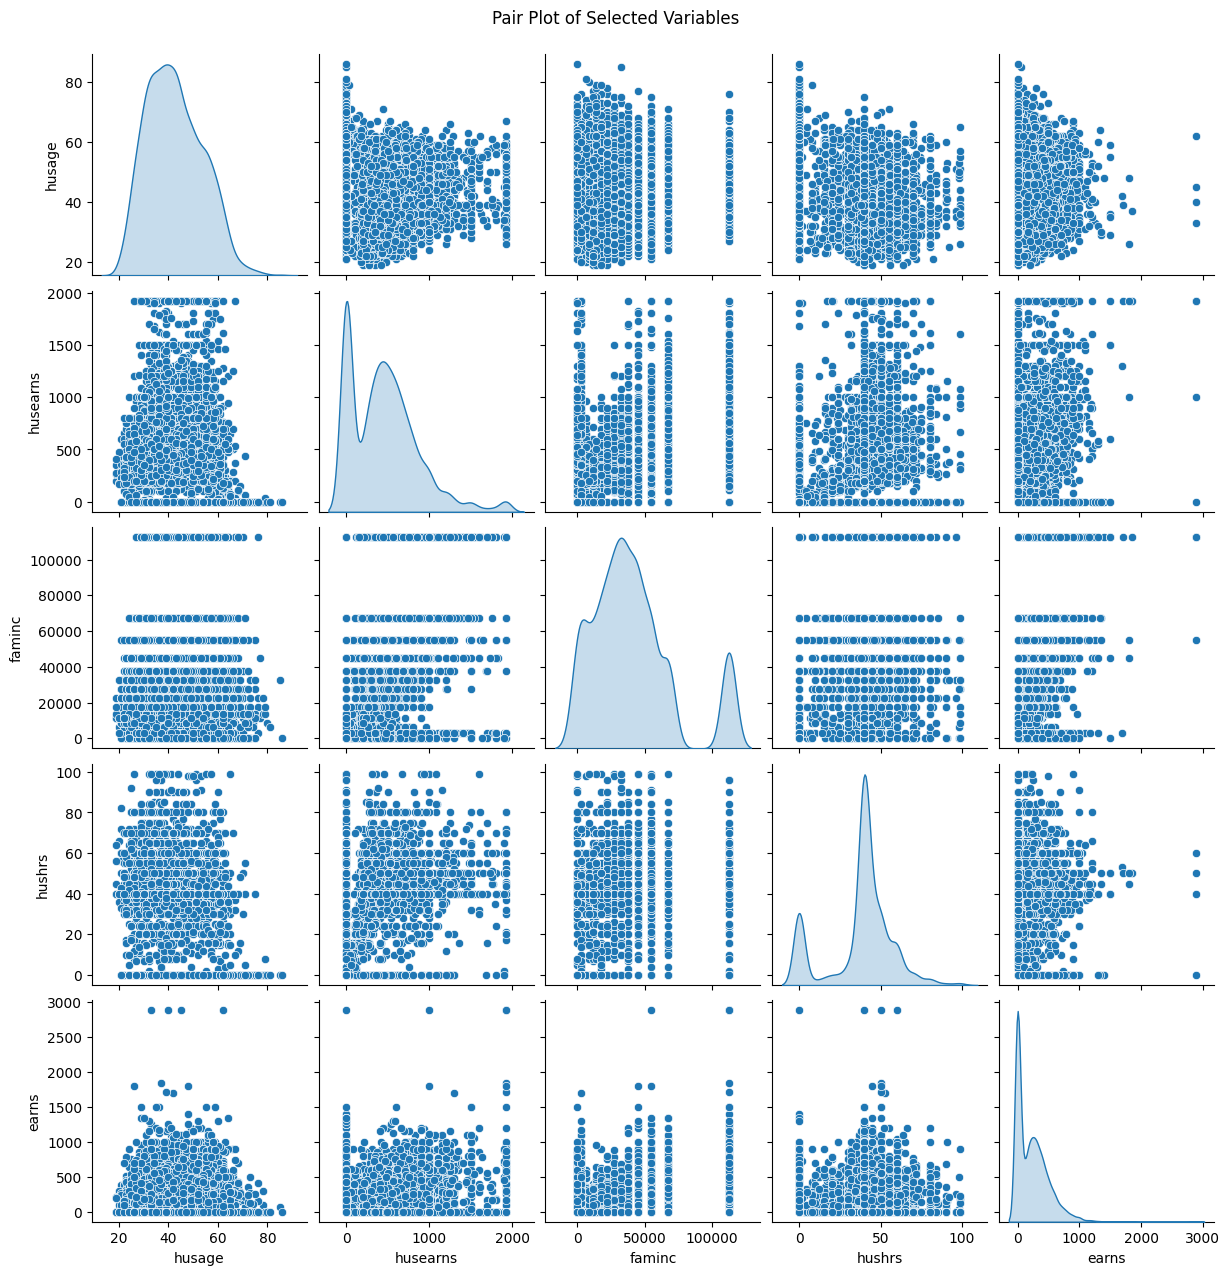

In [ ]:
# Srishti Sinha 21BDS0120

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df[['husage', 'husearns', 'faminc', 'hushrs', 'earns']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Variables')
plt.show()

# Pair plot for selected variables
sns.pairplot(df[['husage', 'husearns', 'faminc', 'hushrs', 'earns']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

**Time Series Analysis (TSA)**: It is a statistical method used to analyze data that is collected over time, typically to identify trends, seasonal patterns, and cyclical fluctuations.

1) Creating a Synthetic Date Index since the dataset doesn't already have a time-based index.

In [ ]:
# Srishti Sinha 21BDS0120

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a date range starting from "2010-01-01" with a frequency of daily data
df['date'] = pd.date_range(start='2010-01-01', periods=len(df), freq='D')
df.set_index('date', inplace=True)  # Set this date range as the index

# Displaying the dataset to verify the new date index
print(df)

            rownames  husage  husunion  husearns  huseduc  husblck  hushisp  \
date                                                                          
2010-01-01         1      42       0.0       568       14        0        0   
2010-01-02         2      26       0.0       600       14        0        0   
2010-01-03         3      56       0.0      1500       14        0        0   
2010-01-04         4      35       0.0         0       12        0        0   
2010-01-05         5      42       0.0       450       11        0        0   
...              ...     ...       ...       ...      ...      ...      ...   
2025-05-31      5630      30       0.0      1000       16        0        0   
2025-06-01      5631      30       0.0       350       16        0        0   
2025-06-02      5632      57       0.0      1000       14        0        0   
2025-06-03      5633      52       0.0      1100       18        0        0   
2025-06-04      5634      47       1.0       680    

2) Visualizing the time series

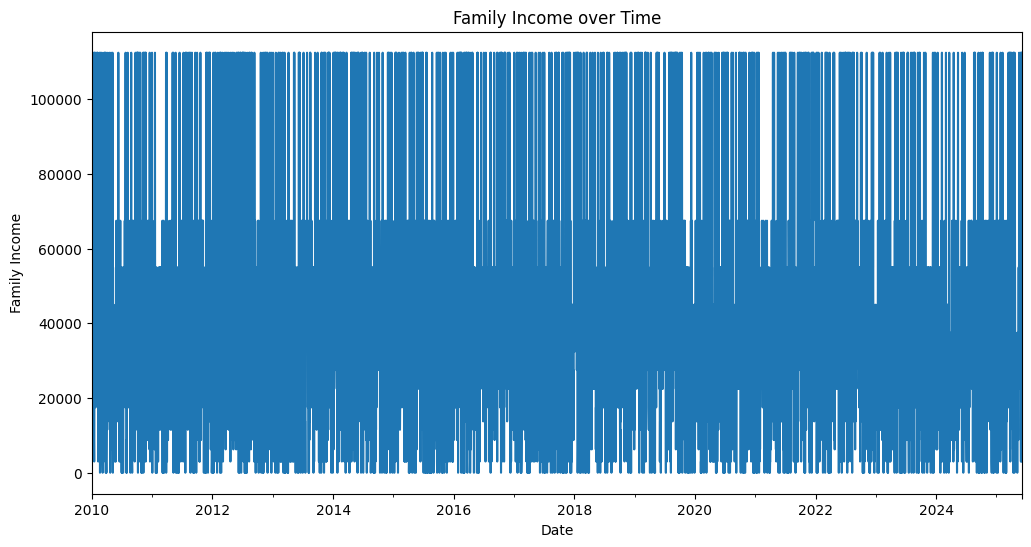

In [ ]:
# Srishti Sinha 21BDS0120

# Plotting a time series, e.g., family income (faminc)
plt.figure(figsize=(12, 6))
df['faminc'].plot(title='Family Income over Time')
plt.xlabel('Date')
plt.ylabel('Family Income')
plt.show()

3) Grouping Time Series Data

<ipython-input-18-a337ca86ec1f>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_income = df['faminc'].resample('M').mean()


Monthly average income (first 5 months):
date
2010-01-31    48040.322581
2010-02-28    48464.285714
2010-03-31    41104.838710
2010-04-30    40091.666667
2010-05-31    34790.322581
Freq: ME, Name: faminc, dtype: float64


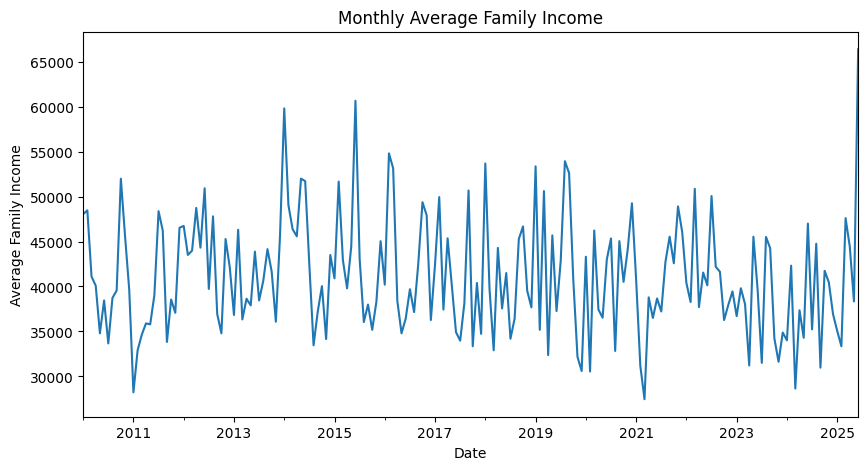

In [ ]:
# Srishti Sinha 21BDS0120

# Group data by month to calculate the monthly average of family income
monthly_avg_income = df['faminc'].resample('M').mean()
print("Monthly average income (first 5 months):")
print(monthly_avg_income.head())

# Plotting monthly averages
plt.figure(figsize=(10, 5))
monthly_avg_income.plot(title='Monthly Average Family Income')
plt.xlabel('Date')
plt.ylabel('Average Family Income')
plt.show()

4) Resampling Time Series Data

<ipython-input-19-0b4632baa413>:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_income = df['faminc'].resample('A').mean()


Annual average income:
date
2010-12-31    41628.767123
2011-12-31    38150.684932
2012-12-31    43721.311475
2013-12-31    40502.739726
2014-12-31    44588.356164
2015-12-31    42919.863014
2016-12-31    42505.464481
2017-12-31    40018.493151
2018-12-31    40777.397260
2019-12-31    42378.082192
2020-12-31    41224.726776
2021-12-31    39733.561644
2022-12-31    41419.178082
2023-12-31    37740.410959
2024-12-31    37774.590164
2025-12-31    40540.322581
Freq: YE-DEC, Name: faminc, dtype: float64


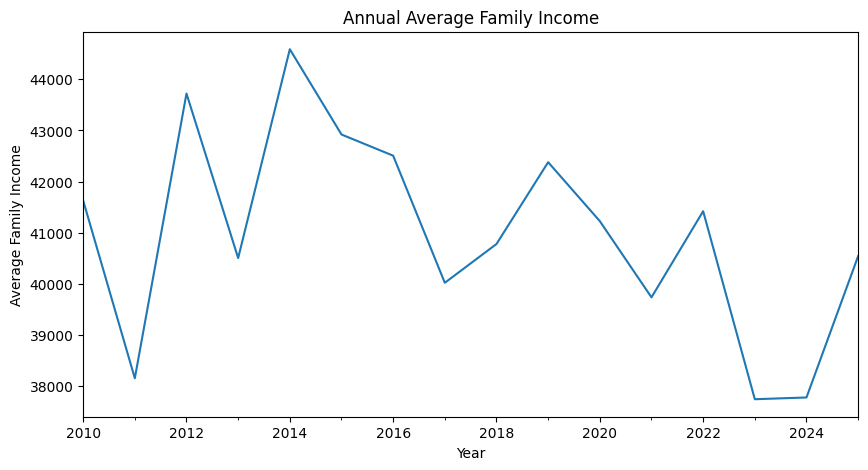

<ipython-input-19-0b4632baa413>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_income = df['faminc'].resample('M').mean()


Daily interpolated income (first 15 days):
date
2010-01-31    48040.322581
2010-02-01    48055.464121
2010-02-02    48070.605662
2010-02-03    48085.747202
2010-02-04    48100.888743
2010-02-05    48116.030283
2010-02-06    48131.171824
2010-02-07    48146.313364
2010-02-08    48161.454905
2010-02-09    48176.596445
2010-02-10    48191.737986
2010-02-11    48206.879526
2010-02-12    48222.021066
2010-02-13    48237.162607
2010-02-14    48252.304147
Freq: D, Name: faminc, dtype: float64


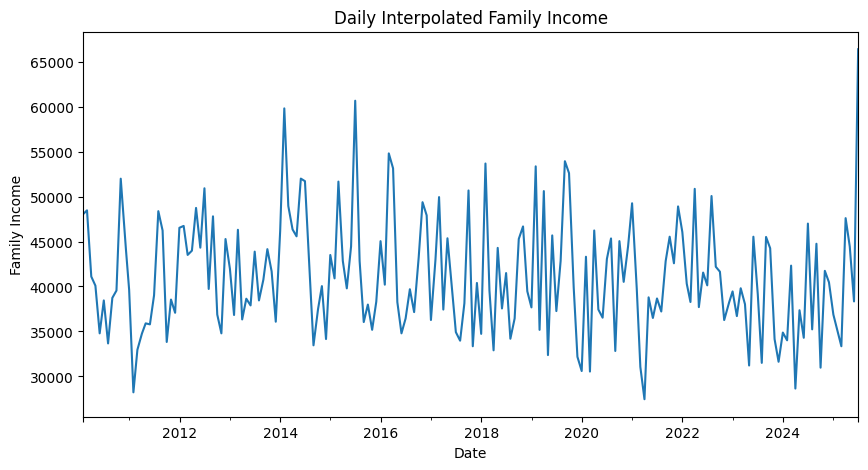

In [ ]:
# Srishti Sinha 21BDS0120

# Downsampling to annual frequency and calculating the mean
annual_income = df['faminc'].resample('A').mean()
print("Annual average income:")
print(annual_income)

# Plotting annual averages
plt.figure(figsize=(10, 5))
annual_income.plot(title='Annual Average Family Income')
plt.xlabel('Year')
plt.ylabel('Average Family Income')
plt.show()

# Upsampling from monthly to daily frequency and interpolating missing values
monthly_income = df['faminc'].resample('M').mean()
daily_interpolated_income = monthly_income.resample('D').interpolate(method='linear')
print("Daily interpolated income (first 15 days):")
print(daily_interpolated_income.head(15))

# Plotting daily interpolated income
plt.figure(figsize=(10, 5))
daily_interpolated_income.plot(title='Daily Interpolated Family Income')
plt.xlabel('Date')
plt.ylabel('Family Income')
plt.show()

##MODULE 4: Data Summarization and Visualization


1) Statistical Summary Measures

In [ ]:
# Srishti Sinha 21BDS0120

# Display statistical summary of the dataset
summary_stats = df.describe(include='all')
print("Statistical Summary:")
print(summary_stats)

Statistical Summary:
           rownames       husage     husunion     husearns      huseduc  \
count   5634.000000  5634.000000  5634.000000  5634.000000  5634.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean    2817.500000    42.452964     0.171104   453.540646    13.147675   
std     1626.540039    11.228167     0.376633   406.987817     2.977194   
min        1.000000    19.000000     0.000000     0.000000     0.000000   
25%     1409.250000    34.000000     0.000000     0.000000    12.000000   
50%     2817.500000    41.000000     0.000000   418.500000    12.000000   
75%     4225.750000    50.000000     0.000000   675.000000    16.000000   
max     5634.000000    86.000000     1.000000  1923.000000    18.000000   

            husblck      hushisp       hushrs       kidge6        earns  ...  

2) Data Elaboration: calculating additional statistics that help describe the dataset’s structure.

In [ ]:
# Srishti Sinha 21BDS0120

# Select only the numeric columns for statistical calculations
numeric_df = df.select_dtypes(include=[np.number])

# Calculate additional statistics on the numeric columns only
elaboration_stats = pd.DataFrame({
    "Median": numeric_df.median(),
    "Variance": numeric_df.var(),
    "Skewness": numeric_df.skew(),
    "Kurtosis": numeric_df.kurtosis()
})

print("\n\nAdditional Statistics:")
print(elaboration_stats)


print("\n\nData Structure and Info:")
df.info()

# Missing Value Analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("\n\nMissing Value Analysis:")
print(missing_data[missing_data['Missing Values'] > 0])  # Displaying columns with missing values

# Unique Values in Categorical Columns
categorical_columns = df.select_dtypes(include=['category', 'object']).columns

print("\n\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

# Outlier Detection
numeric_columns = df.select_dtypes(include=[np.number]).columns
outliers = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]

# Displaying detected outliers
print("\n\nOutlier Detection:")
for col, outlier_df in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_df[[col]])



Additional Statistics:
                Median      Variance   Skewness    Kurtosis
rownames   2817.500000  2.645632e+06   0.000000   -1.200000
husage       41.000000  1.260717e+02   0.367338   -0.446221
husunion      0.000000  1.418526e-01   1.747126    1.052821
husearns    418.500000  1.656391e+05   1.043185    1.420211
huseduc      12.000000  8.863684e+00  -0.555883    1.280124
husblck       0.000000  5.593481e-02   3.726731   11.892747
hushisp       0.000000  6.183303e-02   3.490264   10.185559
hushrs       40.000000  3.836976e+02  -0.541795    0.397463
kidge6        0.000000  2.130188e-01   0.834042   -1.304838
earns       185.000000  6.934083e+04   1.879366    8.939348
age          39.000000  9.975234e+01   0.146049   -0.891068
black         0.000000  5.405330e-02   3.809366   12.515711
educ         12.000000  6.840505e+00  -0.616072    2.717476
hispanic      0.000000  6.535880e-02   3.362870    9.312201
union         0.000000  1.275949e-01   1.960293    1.843785
faminc    37500

3) 1-D Statistical Data Analysis: Analyzing one variable at a time.


1-D Analysis for rownames:
Summary Statistics for rownames:
count    5634.000000
mean     2817.500000
std      1626.540039
min         1.000000
25%      1409.250000
50%      2817.500000
75%      4225.750000
max      5634.000000
Name: rownames, dtype: float64
Mode: 1
Range: 5633.0


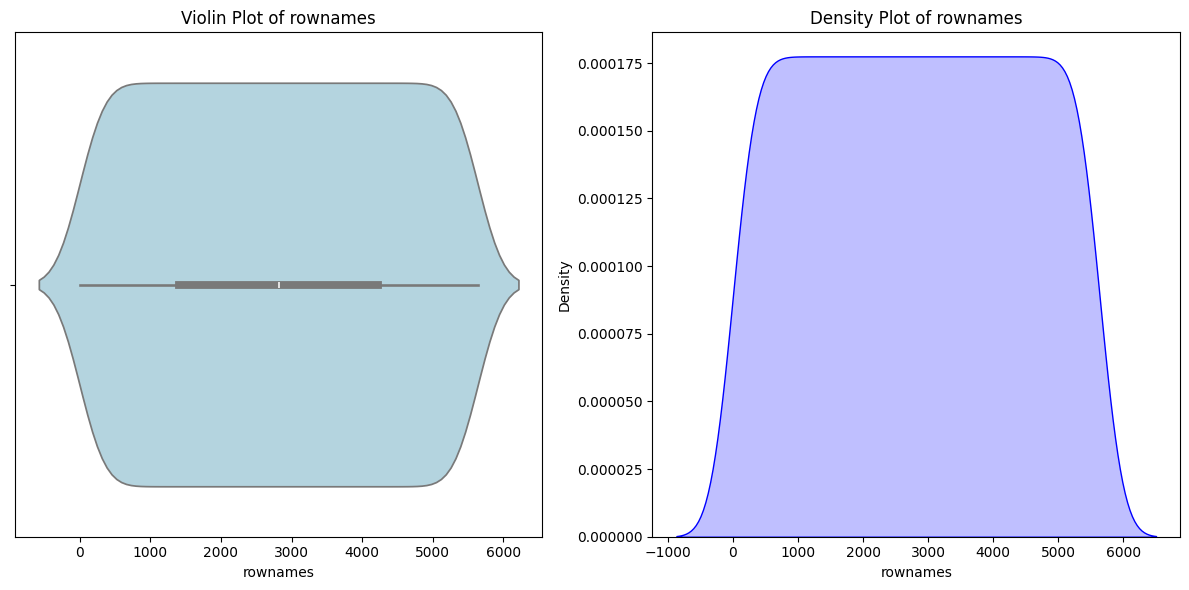


1-D Analysis for husage:
Summary Statistics for husage:
count    5634.000000
mean       42.452964
std        11.228167
min        19.000000
25%        34.000000
50%        41.000000
75%        50.000000
max        86.000000
Name: husage, dtype: float64
Mode: 44
Range: 67.0


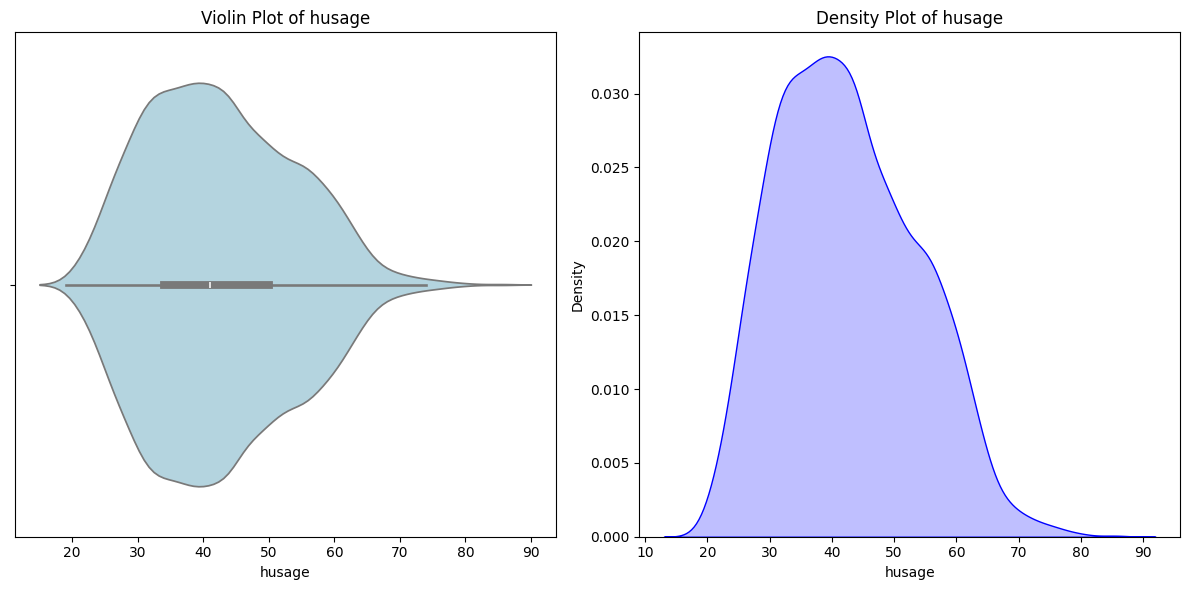


1-D Analysis for husunion:
Summary Statistics for husunion:
count    5634.000000
mean        0.171104
std         0.376633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: husunion, dtype: float64
Mode: 0.0
Range: 1.0


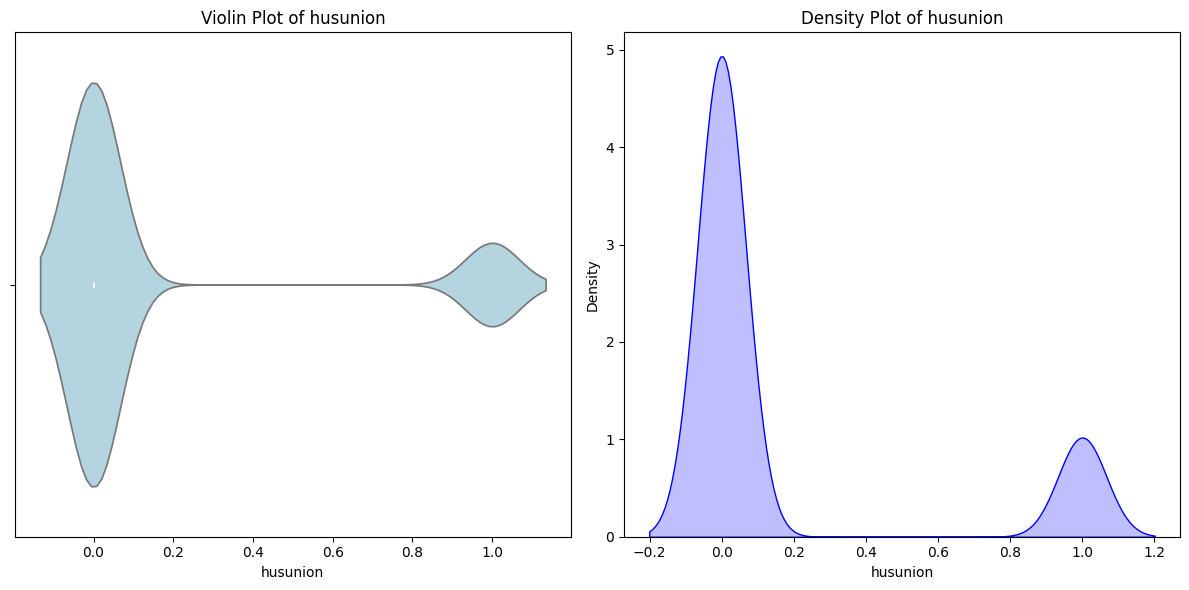


1-D Analysis for husearns:
Summary Statistics for husearns:
count    5634.000000
mean      453.540646
std       406.987817
min         0.000000
25%         0.000000
50%       418.500000
75%       675.000000
max      1923.000000
Name: husearns, dtype: float64
Mode: 0
Range: 1923.0


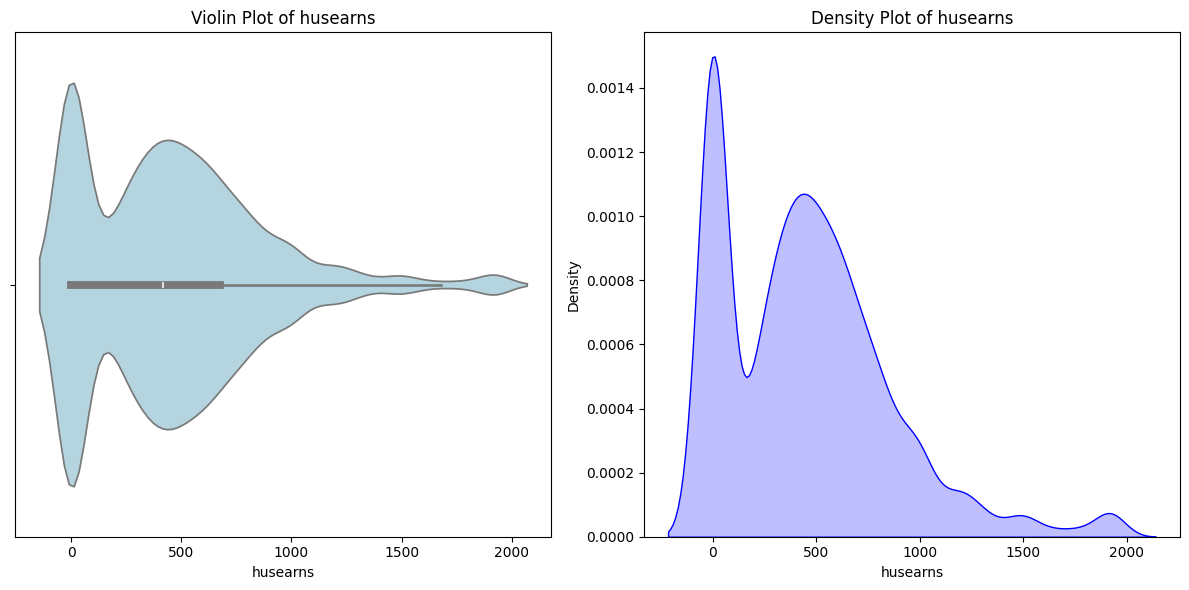


1-D Analysis for huseduc:
Summary Statistics for huseduc:
count    5634.000000
mean       13.147675
std         2.977194
min         0.000000
25%        12.000000
50%        12.000000
75%        16.000000
max        18.000000
Name: huseduc, dtype: float64
Mode: 12
Range: 18.0


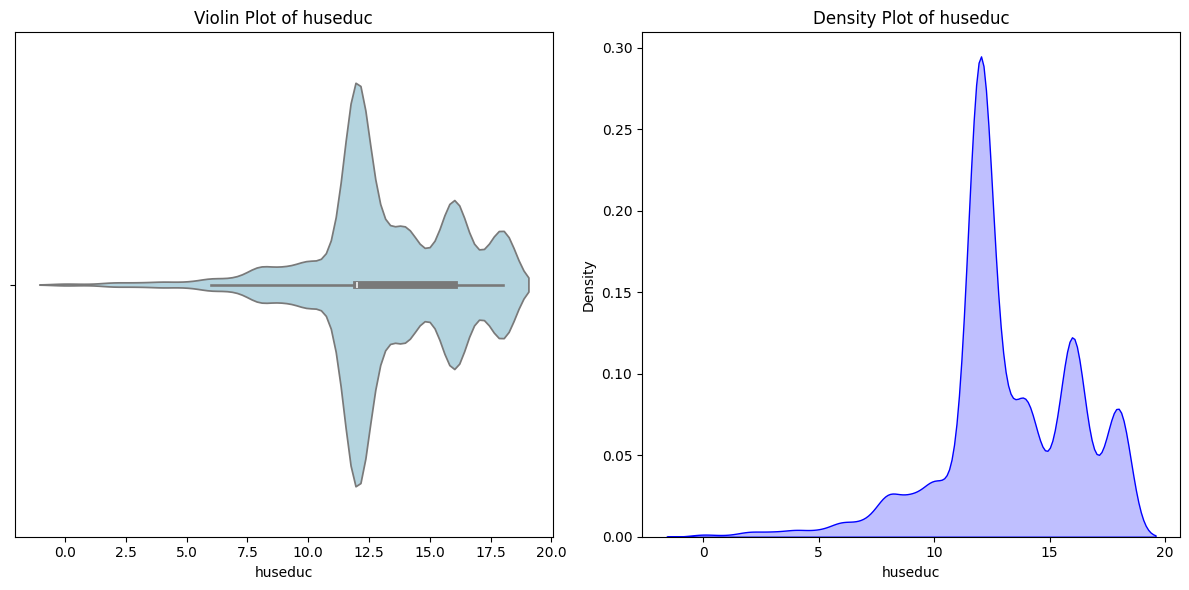


1-D Analysis for husblck:
Summary Statistics for husblck:
count    5634.000000
mean        0.059460
std         0.236505
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: husblck, dtype: float64
Mode: 0
Range: 1.0


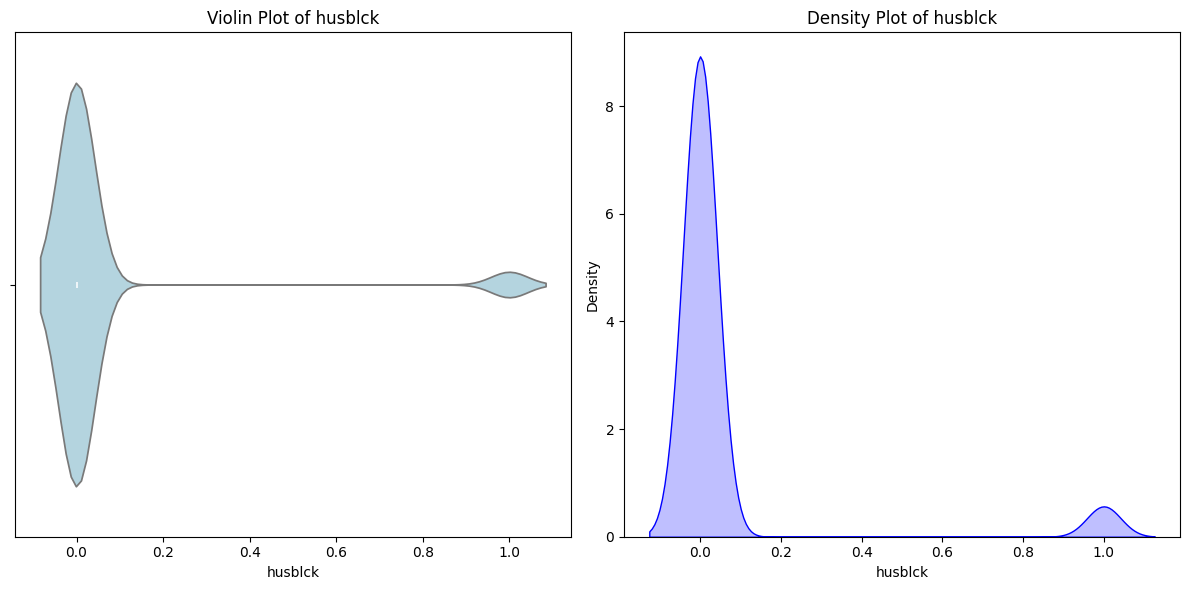


1-D Analysis for hushisp:
Summary Statistics for hushisp:
count    5634.000000
mean        0.066205
std         0.248662
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hushisp, dtype: float64
Mode: 0
Range: 1.0


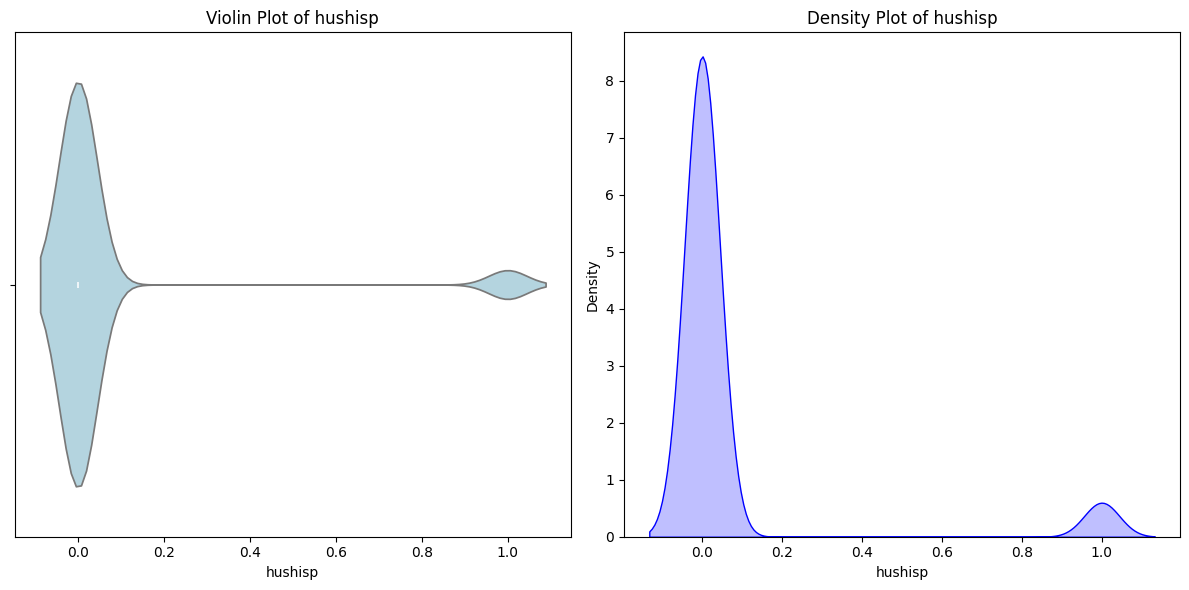


1-D Analysis for hushrs:
Summary Statistics for hushrs:
count    5634.000000
mean       37.883387
std        19.588200
min         0.000000
25%        37.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: hushrs, dtype: float64
Mode: 40
Range: 99.0


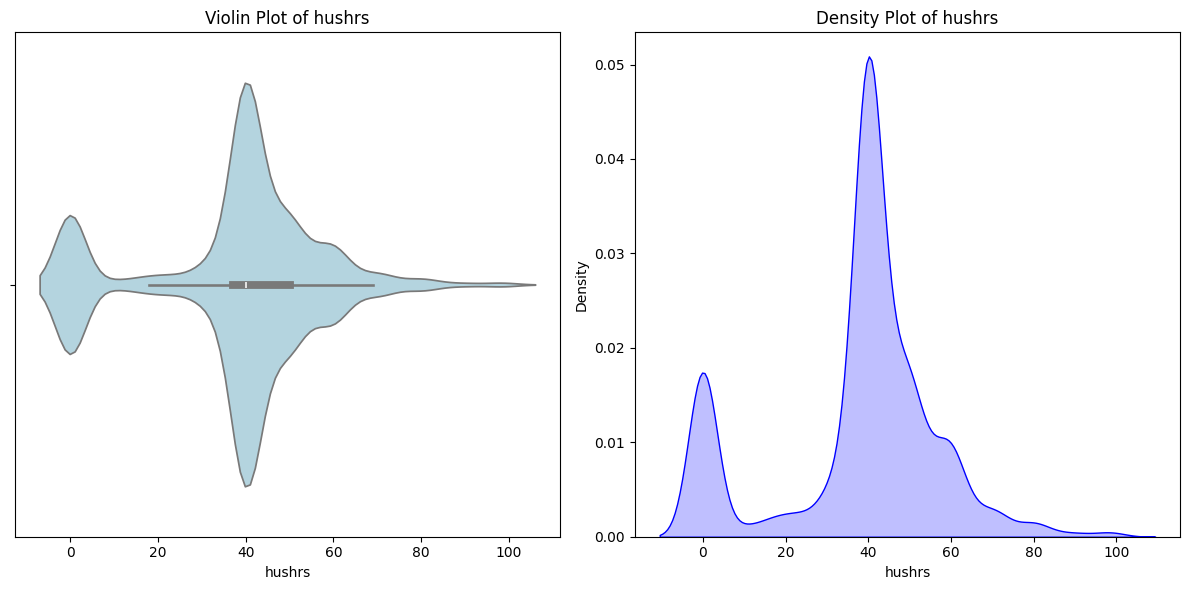


1-D Analysis for kidge6:
Summary Statistics for kidge6:
count    5634.000000
mean        0.307597
std         0.461540
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: kidge6, dtype: float64
Mode: 0
Range: 1.0


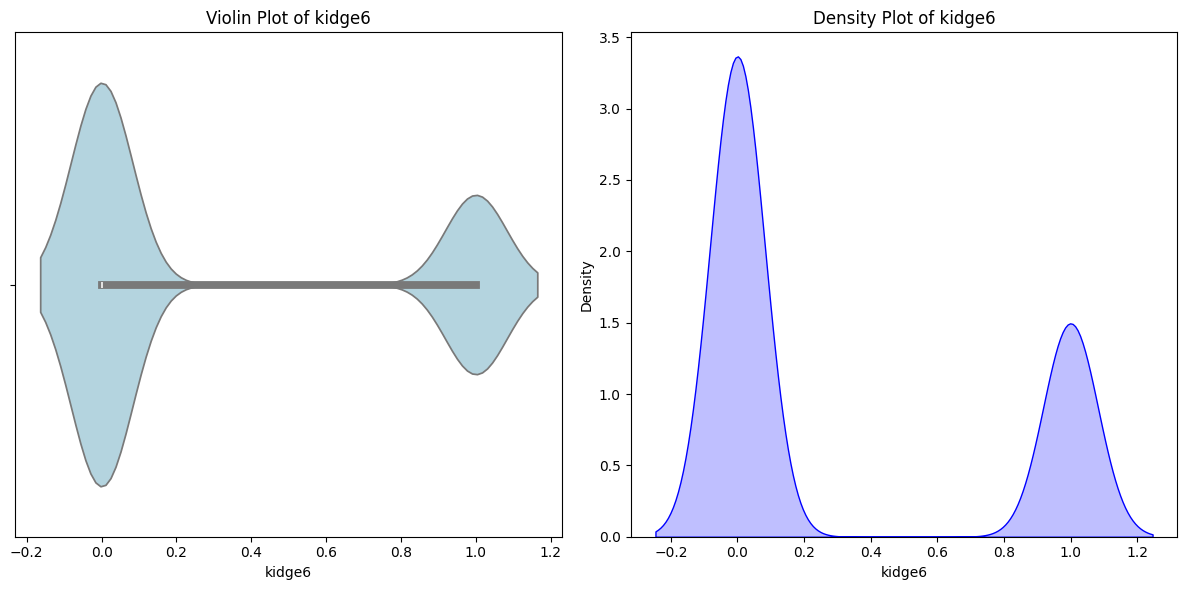


1-D Analysis for earns:
Summary Statistics for earns:
count    5634.000000
mean      232.832978
std       263.326465
min         0.000000
25%         0.000000
50%       185.000000
75%       380.000000
max      2884.500000
Name: earns, dtype: float64
Mode: 0.0
Range: 2884.5


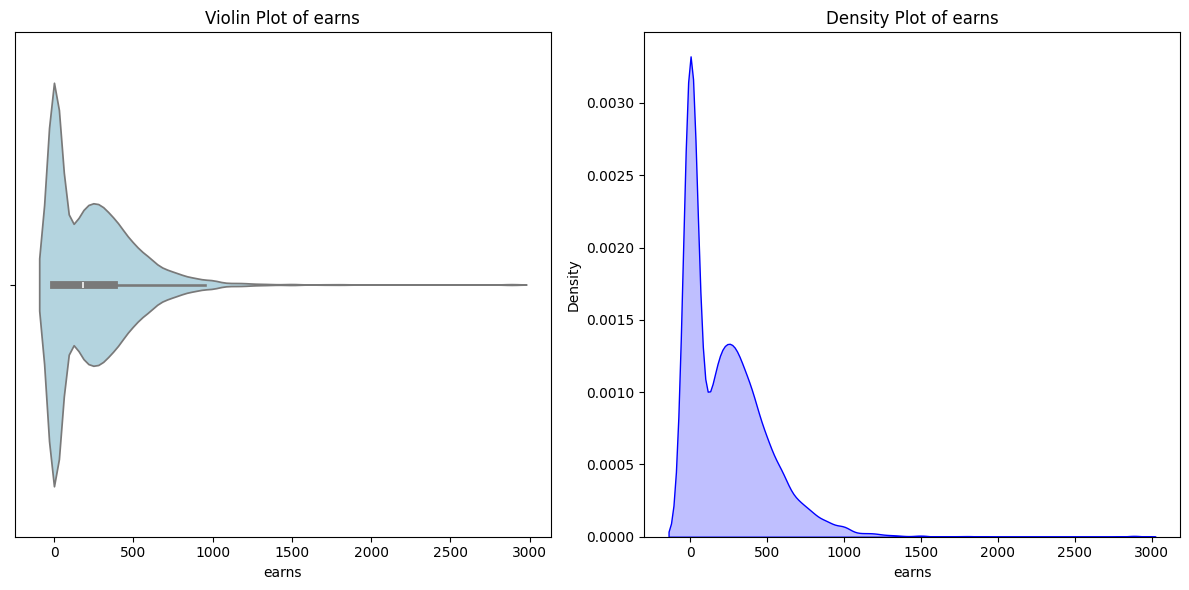


1-D Analysis for age:
Summary Statistics for age:
count    5634.000000
mean       39.427583
std         9.987610
min        18.000000
25%        31.000000
50%        39.000000
75%        47.000000
max        59.000000
Name: age, dtype: float64
Mode: 37
Range: 41.0


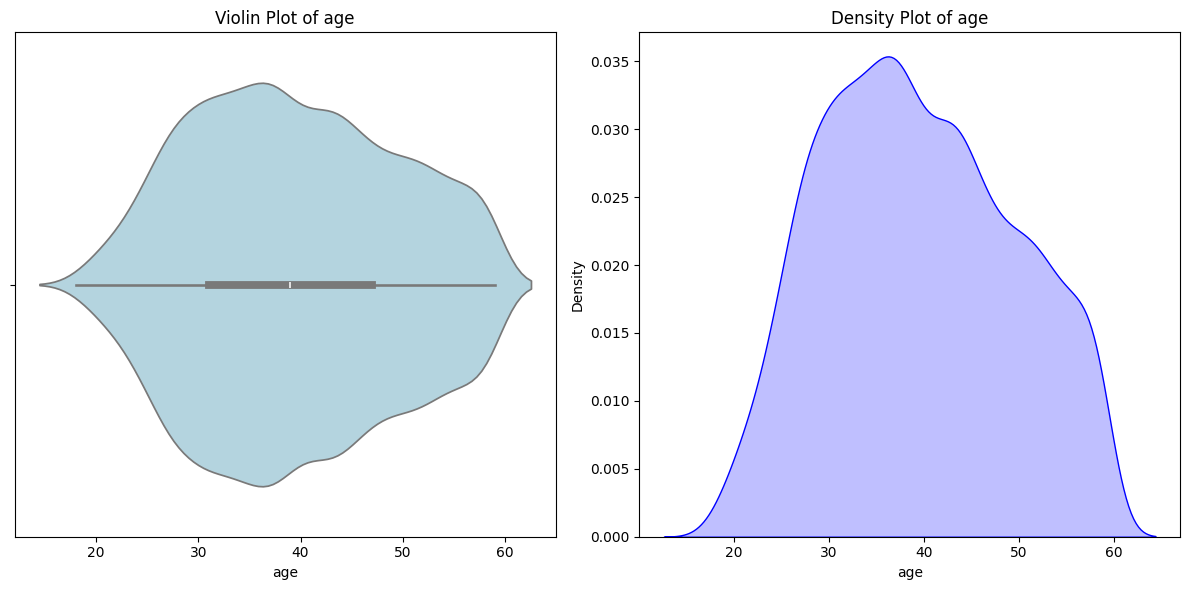


1-D Analysis for black:
Summary Statistics for black:
count    5634.000000
mean        0.057330
std         0.232494
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: black, dtype: float64
Mode: 0
Range: 1.0


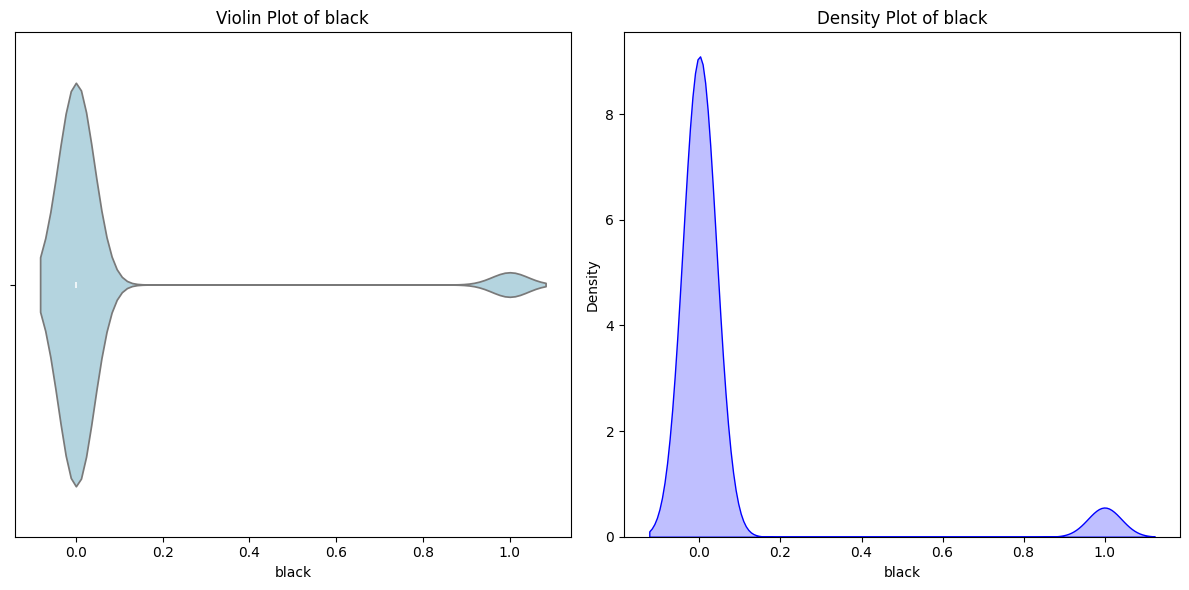


1-D Analysis for educ:
Summary Statistics for educ:
count    5634.000000
mean       12.984026
std         2.615436
min         0.000000
25%        12.000000
50%        12.000000
75%        15.000000
max        18.000000
Name: educ, dtype: float64
Mode: 12
Range: 18.0


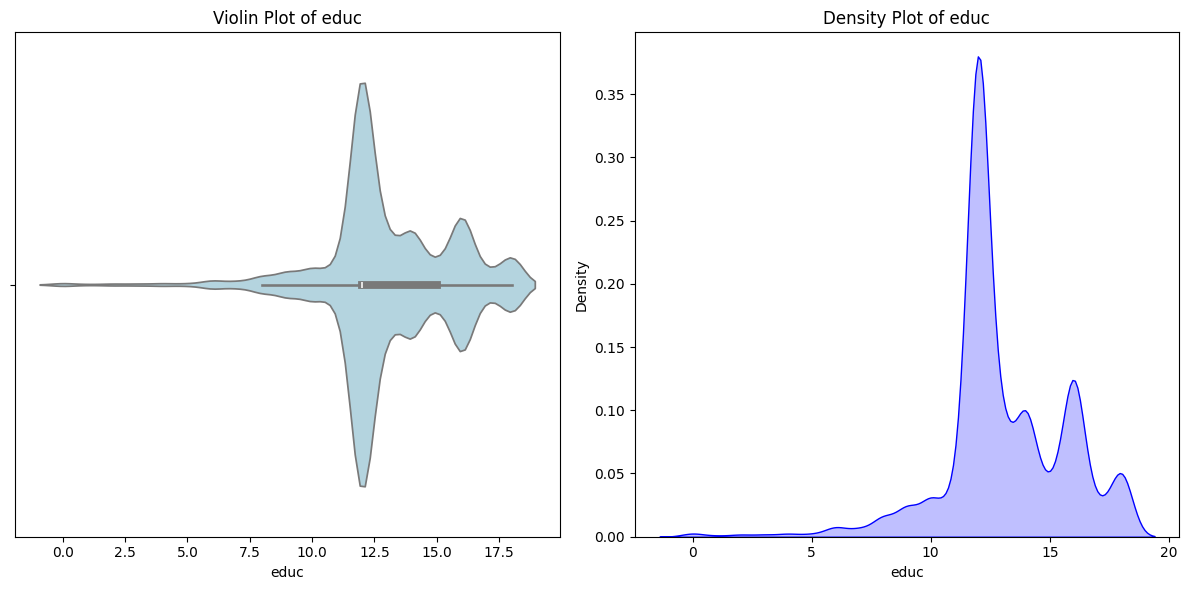


1-D Analysis for hispanic:
Summary Statistics for hispanic:
count    5634.000000
mean        0.070288
std         0.255654
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hispanic, dtype: float64
Mode: 0
Range: 1.0


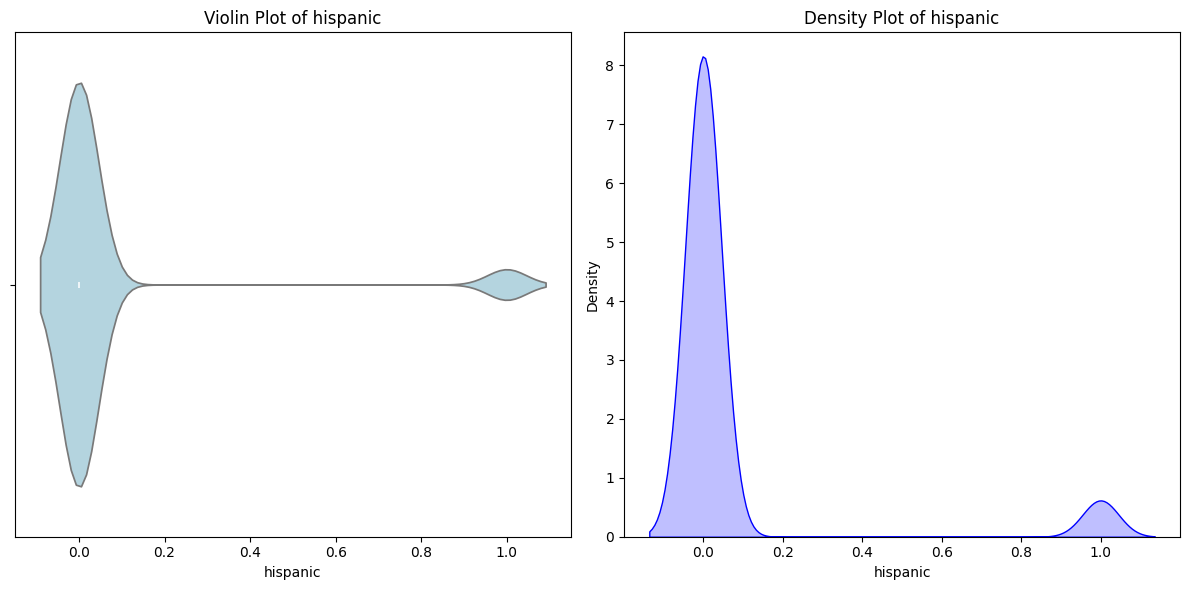


1-D Analysis for union:
Summary Statistics for union:
count    3558.000000
mean        0.150084
std         0.357204
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: union, dtype: float64
Mode: 0.0
Range: 1.0


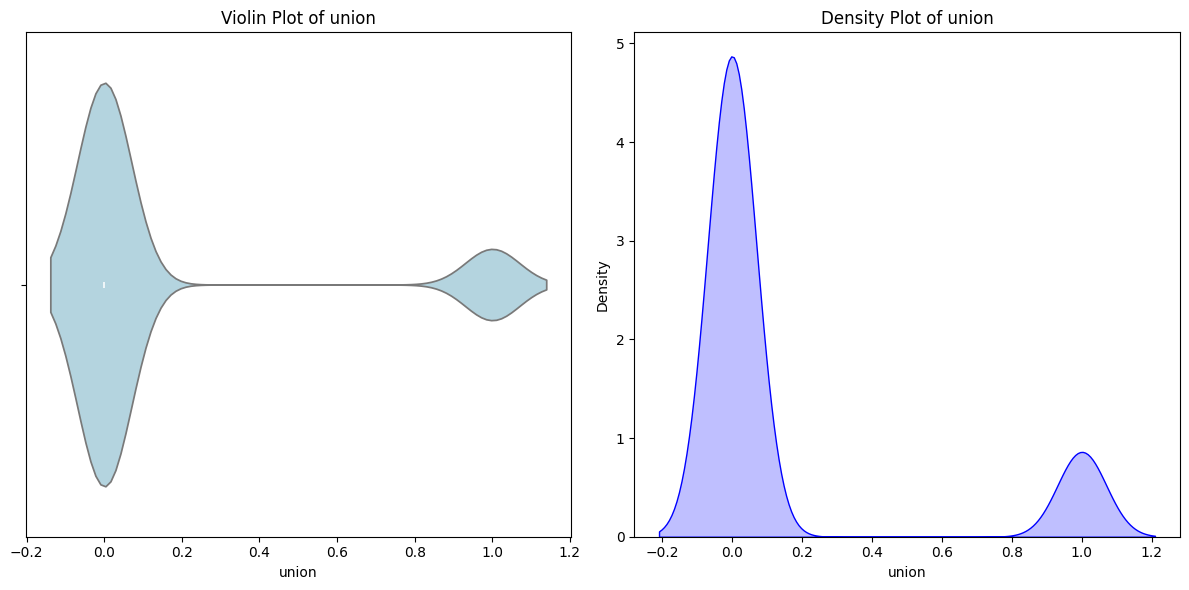


1-D Analysis for faminc:
Summary Statistics for faminc:
count      5634.000000
mean      40992.988995
std       30350.402663
min           0.000000
25%       22500.000000
50%       37500.000000
75%       55000.000000
max      112500.000000
Name: faminc, dtype: float64
Mode: 45000
Range: 112500.0


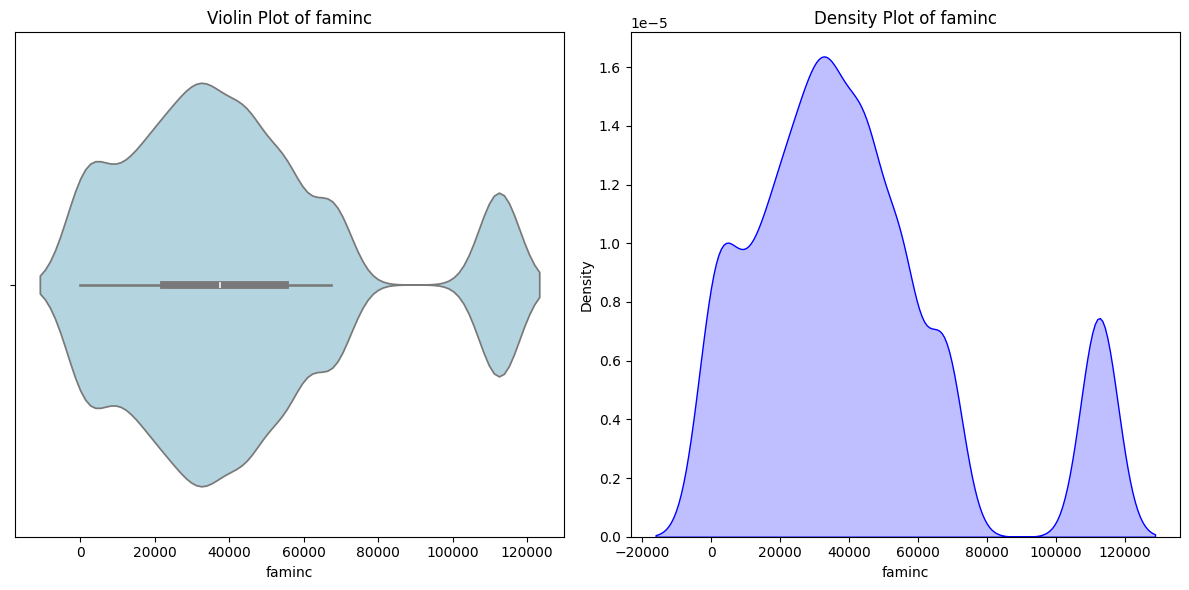


1-D Analysis for husexp:
Summary Statistics for husexp:
count    5634.000000
mean       23.305289
std        11.760940
min         0.000000
25%        14.000000
50%        22.000000
75%        32.000000
max        72.000000
Name: husexp, dtype: float64
Mode: 19
Range: 72.0


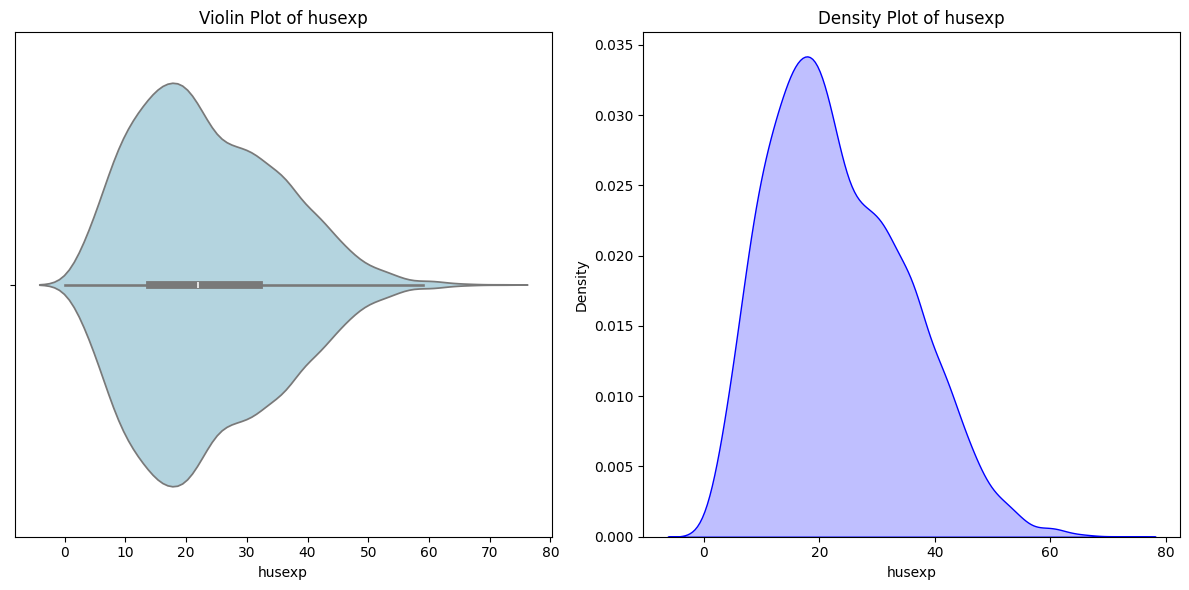


1-D Analysis for exper:
Summary Statistics for exper:
count    5634.000000
mean       20.443912
std        10.445489
min         0.000000
25%        12.000000
50%        19.000000
75%        29.000000
max        52.000000
Name: exper, dtype: float64
Mode: 20
Range: 52.0


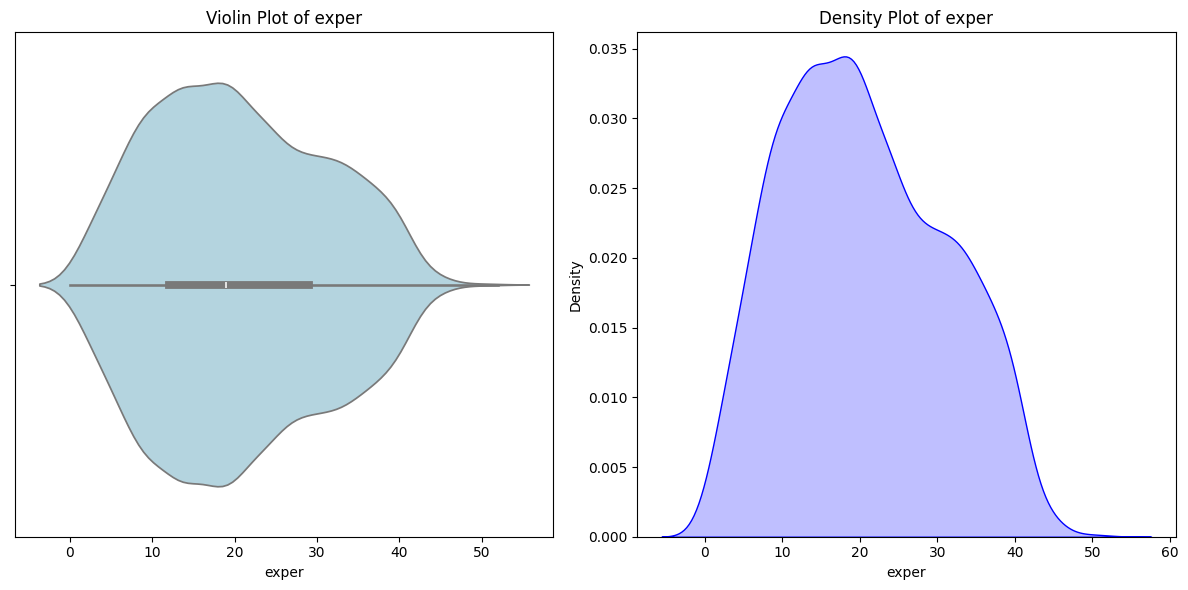


1-D Analysis for kidlt6:
Summary Statistics for kidlt6:
count    5634.000000
mean        0.279375
std         0.448732
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: kidlt6, dtype: float64
Mode: 0
Range: 1.0


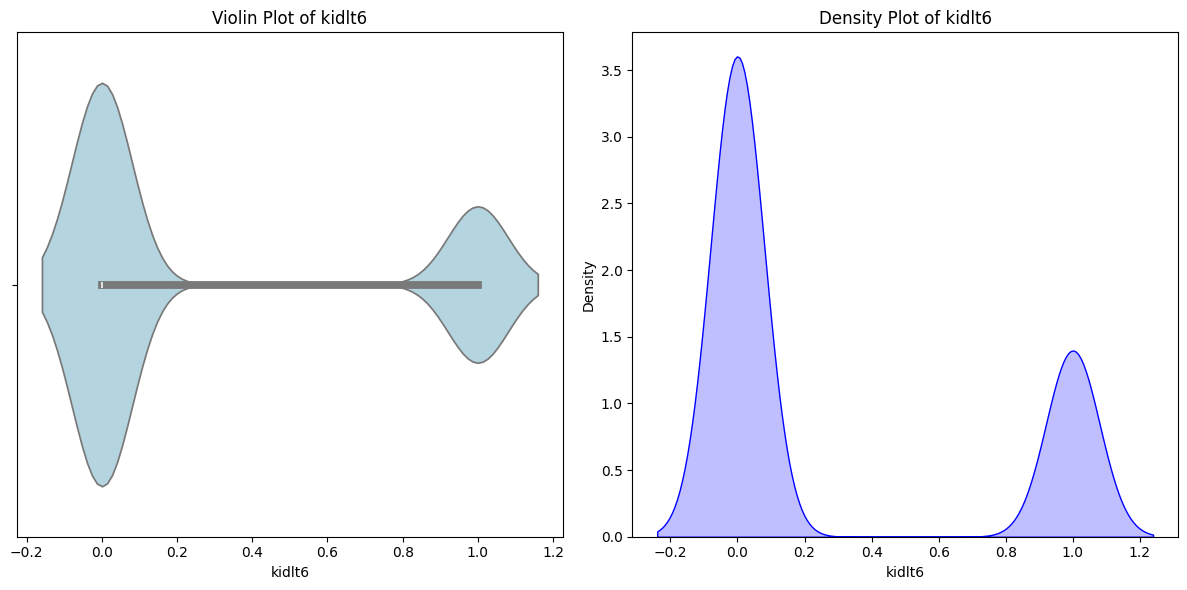


1-D Analysis for hours:
Summary Statistics for hours:
count    5634.000000
mean       20.722222
std        19.396176
min         0.000000
25%         0.000000
50%        24.000000
75%        40.000000
max       120.000000
Name: hours, dtype: float64
Mode: 0
Range: 120.0


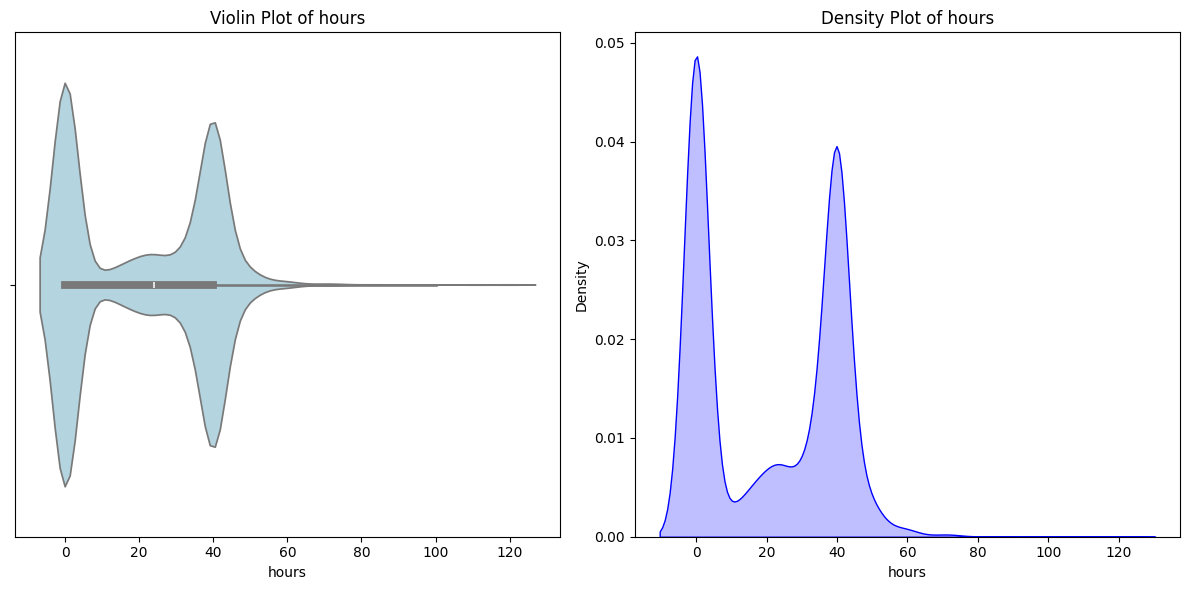


1-D Analysis for expersq:
Summary Statistics for expersq:
count    5634.000000
mean      527.042421
std       468.288804
min         0.000000
25%       144.000000
50%       361.000000
75%       841.000000
max      2704.000000
Name: expersq, dtype: float64
Mode: 400
Range: 2704.0


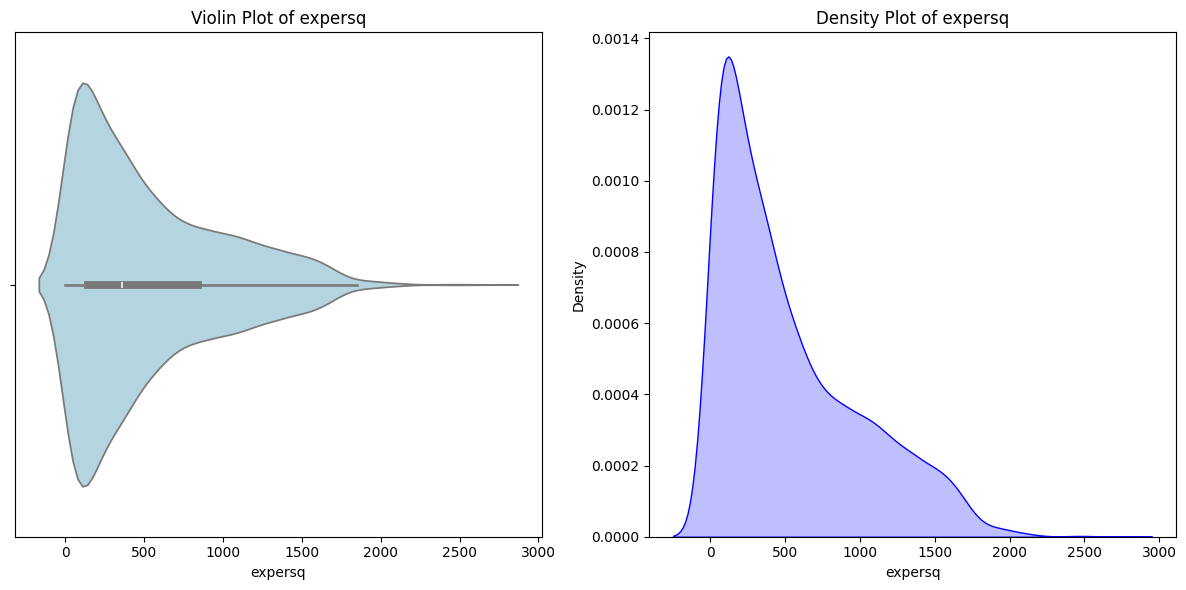


1-D Analysis for nwifeinc:
Summary Statistics for nwifeinc:
count    5634.000000
mean       30.269228
std        27.211584
min         0.000000
25%        11.500000
50%        24.200001
75%        40.167000
max       112.500000
Name: nwifeinc, dtype: float64
Mode: 0.0
Range: 112.5


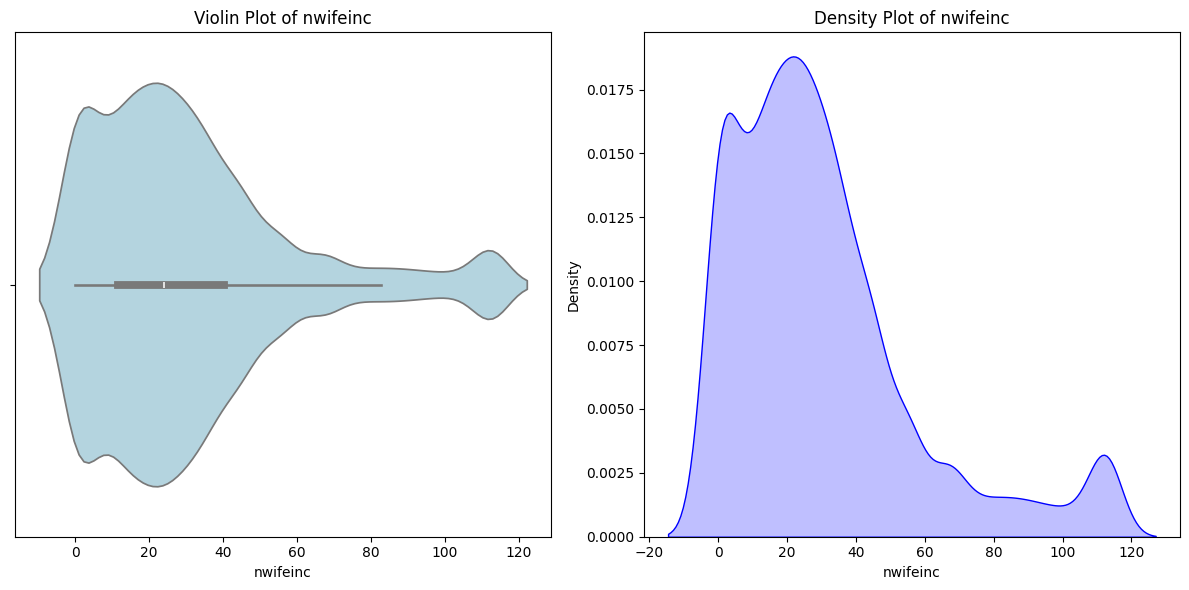


1-D Analysis for inlf:
Summary Statistics for inlf:
count    5634.000000
mean        0.583245
std         0.493065
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: inlf, dtype: float64
Mode: 1
Range: 1.0


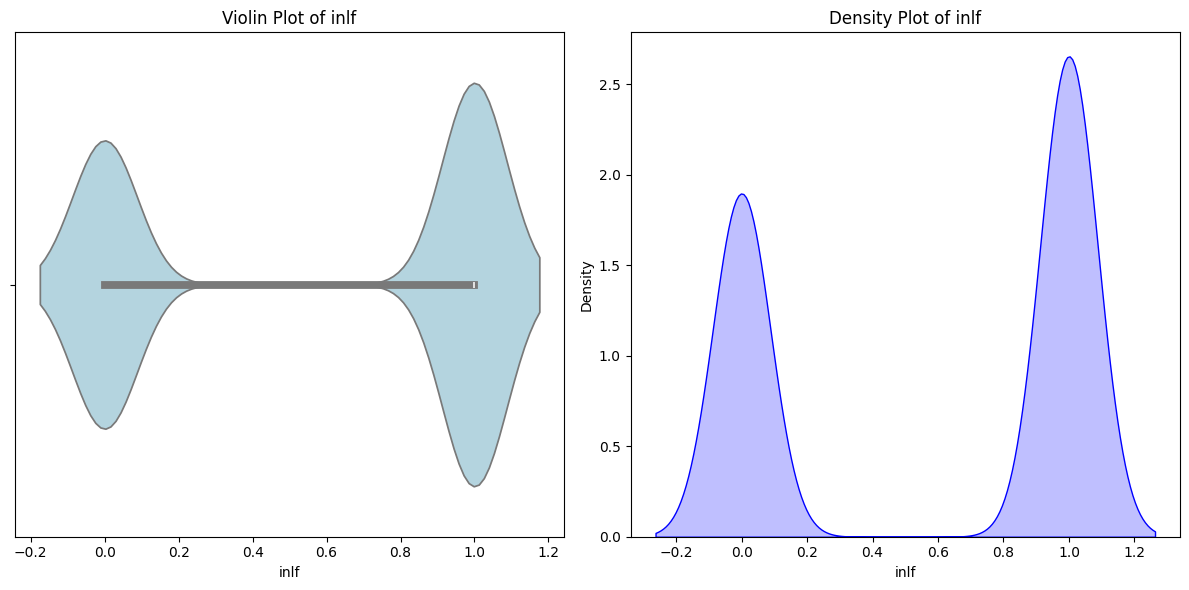


1-D Analysis for hrwage:
Summary Statistics for hrwage:
count    5634.000000
mean       10.367213
std         5.372137
min         0.033333
25%         8.000000
50%        10.367213
75%        10.367213
max       200.000000
Name: hrwage, dtype: float64
Mode: 10.367212532673141
Range: 199.9666666649282


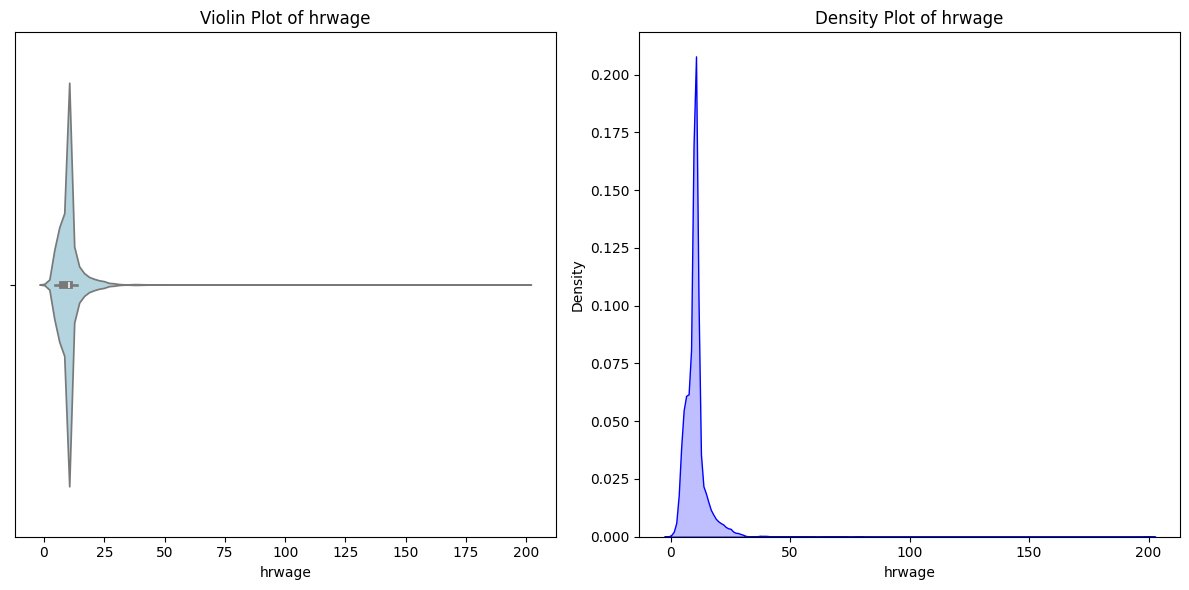


1-D Analysis for lwage:
Summary Statistics for lwage:
count    5634.000000
mean        2.195801
std         0.400955
min        -3.401197
25%         2.079442
50%         2.195801
75%         2.278914
max         5.298317
Name: lwage, dtype: float64
Mode: 2.1958012528381947
Range: 8.699514865875244


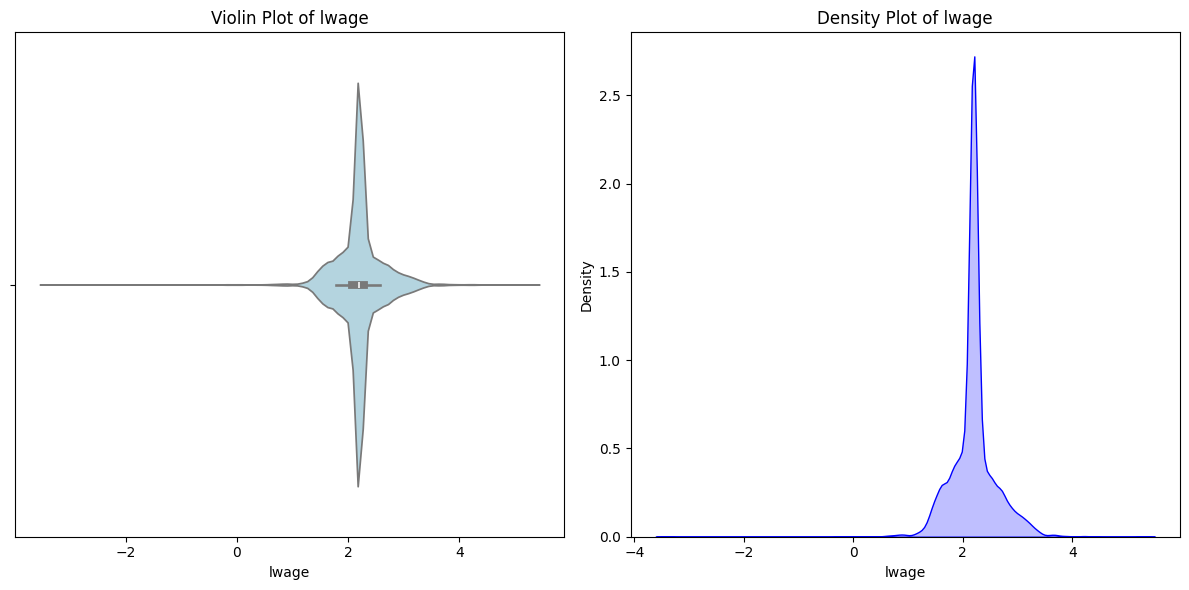

In [ ]:
# Srishti Sinha 21BDS0120

numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    print(f"\n1-D Analysis for {col}:")

    # Summary Statistics
    print(f"Summary Statistics for {col}:")
    summary = df[col].describe()
    mode = df[col].mode()[0]  # Getting mode
    data_range = summary['max'] - summary['min']  # Calculate range
    print(summary)
    print(f"Mode: {mode}")
    print(f"Range: {data_range}")

    # Visualizations
    plt.figure(figsize=(12, 6))

    # Violin Plot
    plt.subplot(1, 2, 1)
    sns.violinplot(x=df[col], color='lightblue')
    plt.title(f'Violin Plot of {col}')

    # Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[col], color='blue', fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

4) 2-D Statistical Data Analysis: Analyzing relationships between two variables.

Correlation between Family Income and Earns:
          faminc     earns
faminc  1.000000  0.299252
earns   0.299252  1.000000

Covariance between Family Income and Earns:
              faminc         earns
faminc  9.211469e+08  2.391641e+06
earns   2.391641e+06  6.934083e+04


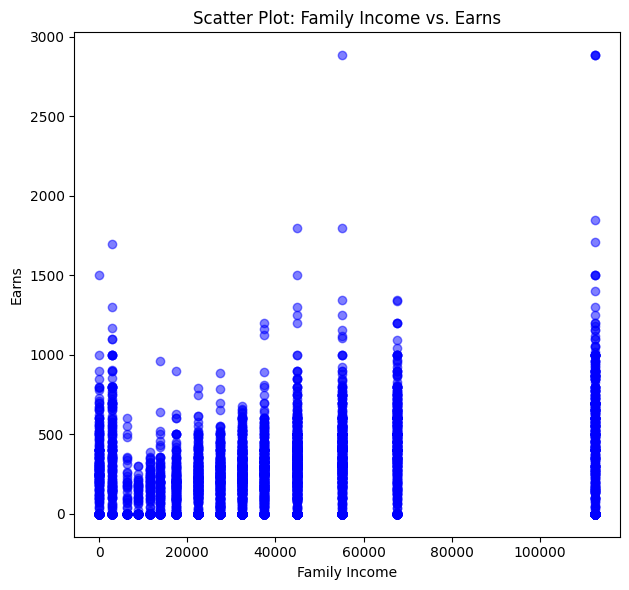

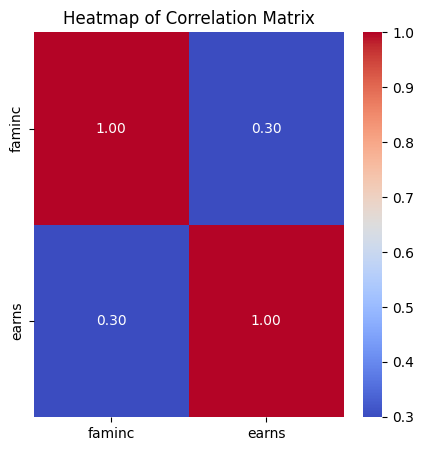

In [ ]:
# Srishti Sinha 21BDS0120

# Calculating correlation and covariance between 'faminc' and 'earns' (if both exist)
correlation = df[['faminc', 'earns']].corr()
covariance = df[['faminc', 'earns']].cov()

print("Correlation between Family Income and Earns:")
print(correlation)
print("\nCovariance between Family Income and Earns:")
print(covariance)

# Visualization
plt.figure(figsize=(12, 6))

# Scatter Plot for Family Income vs. Earns
plt.subplot(1, 2, 1)
plt.scatter(df['faminc'], df['earns'], alpha=0.5, color='blue')
plt.title("Scatter Plot: Family Income vs. Earns")
plt.xlabel("Family Income")
plt.ylabel("Earns")

plt.tight_layout()
plt.show()

# Heatmap of Correlation Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()


 **Contingency Table**

In [ ]:
# Srishti Sinha 21BDS0120

contingency_table = pd.crosstab(df['husunion'], df['inlf'], margins=True)
print("Contingency Table between husunion and inlf: \n")
print(contingency_table)

Contingency Table between husunion and inlf: 

inlf         0     1   All
husunion                  
0.0       1955  2715  4670
1.0        393   571   964
All       2348  3286  5634


**Stacked Bar Plot**

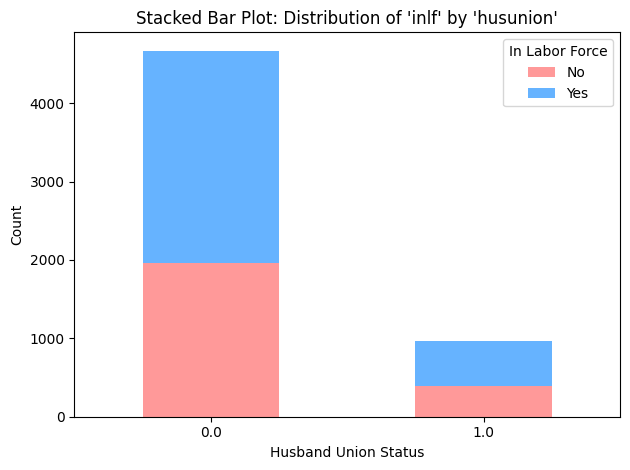

In [ ]:
# Srishti Sinha 21BDS0120

# First, we create a DataFrame for the stacked bar plot
stacked_data = df.groupby(['husunion', 'inlf']).size().unstack()

# Plotting
stacked_data.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title("Stacked Bar Plot: Distribution of 'inlf' by 'husunion'")
plt.xlabel('Husband Union Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='In Labor Force', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

5) n-D Statistical Data Analysis: Analyzing relationships among more than two variables using multi-dimensional statistics.


n-D Statistical Analysis (Pairwise Correlation):
          rownames    husage  husunion  husearns   huseduc   husblck  \
rownames  1.000000  0.017502  0.016617 -0.008355 -0.022200  0.014075   
husage    0.017502  1.000000 -0.004519 -0.079956 -0.050620 -0.004729   
husunion  0.016617 -0.004519  1.000000  0.181749 -0.040270  0.051180   
husearns -0.008355 -0.079956  0.181749  1.000000  0.310730 -0.056643   
huseduc  -0.022200 -0.050620 -0.040270  0.310730  1.000000 -0.084328   
husblck   0.014075 -0.004729  0.051180 -0.056643 -0.084328  1.000000   
hushisp  -0.004944 -0.058621 -0.018618 -0.072946 -0.256362 -0.048838   
hushrs   -0.002015 -0.255914  0.069118  0.333011  0.207321 -0.067556   
kidge6    0.017720 -0.011167  0.052571  0.066039  0.020294  0.016190   
earns    -0.019034 -0.033641 -0.000345  0.164395  0.223625  0.025689   
age       0.009269  0.853796  0.011034 -0.022193 -0.015157 -0.011442   
black     0.009932 -0.003557  0.054198 -0.051693 -0.077891  0.909788   
educ     -0.02

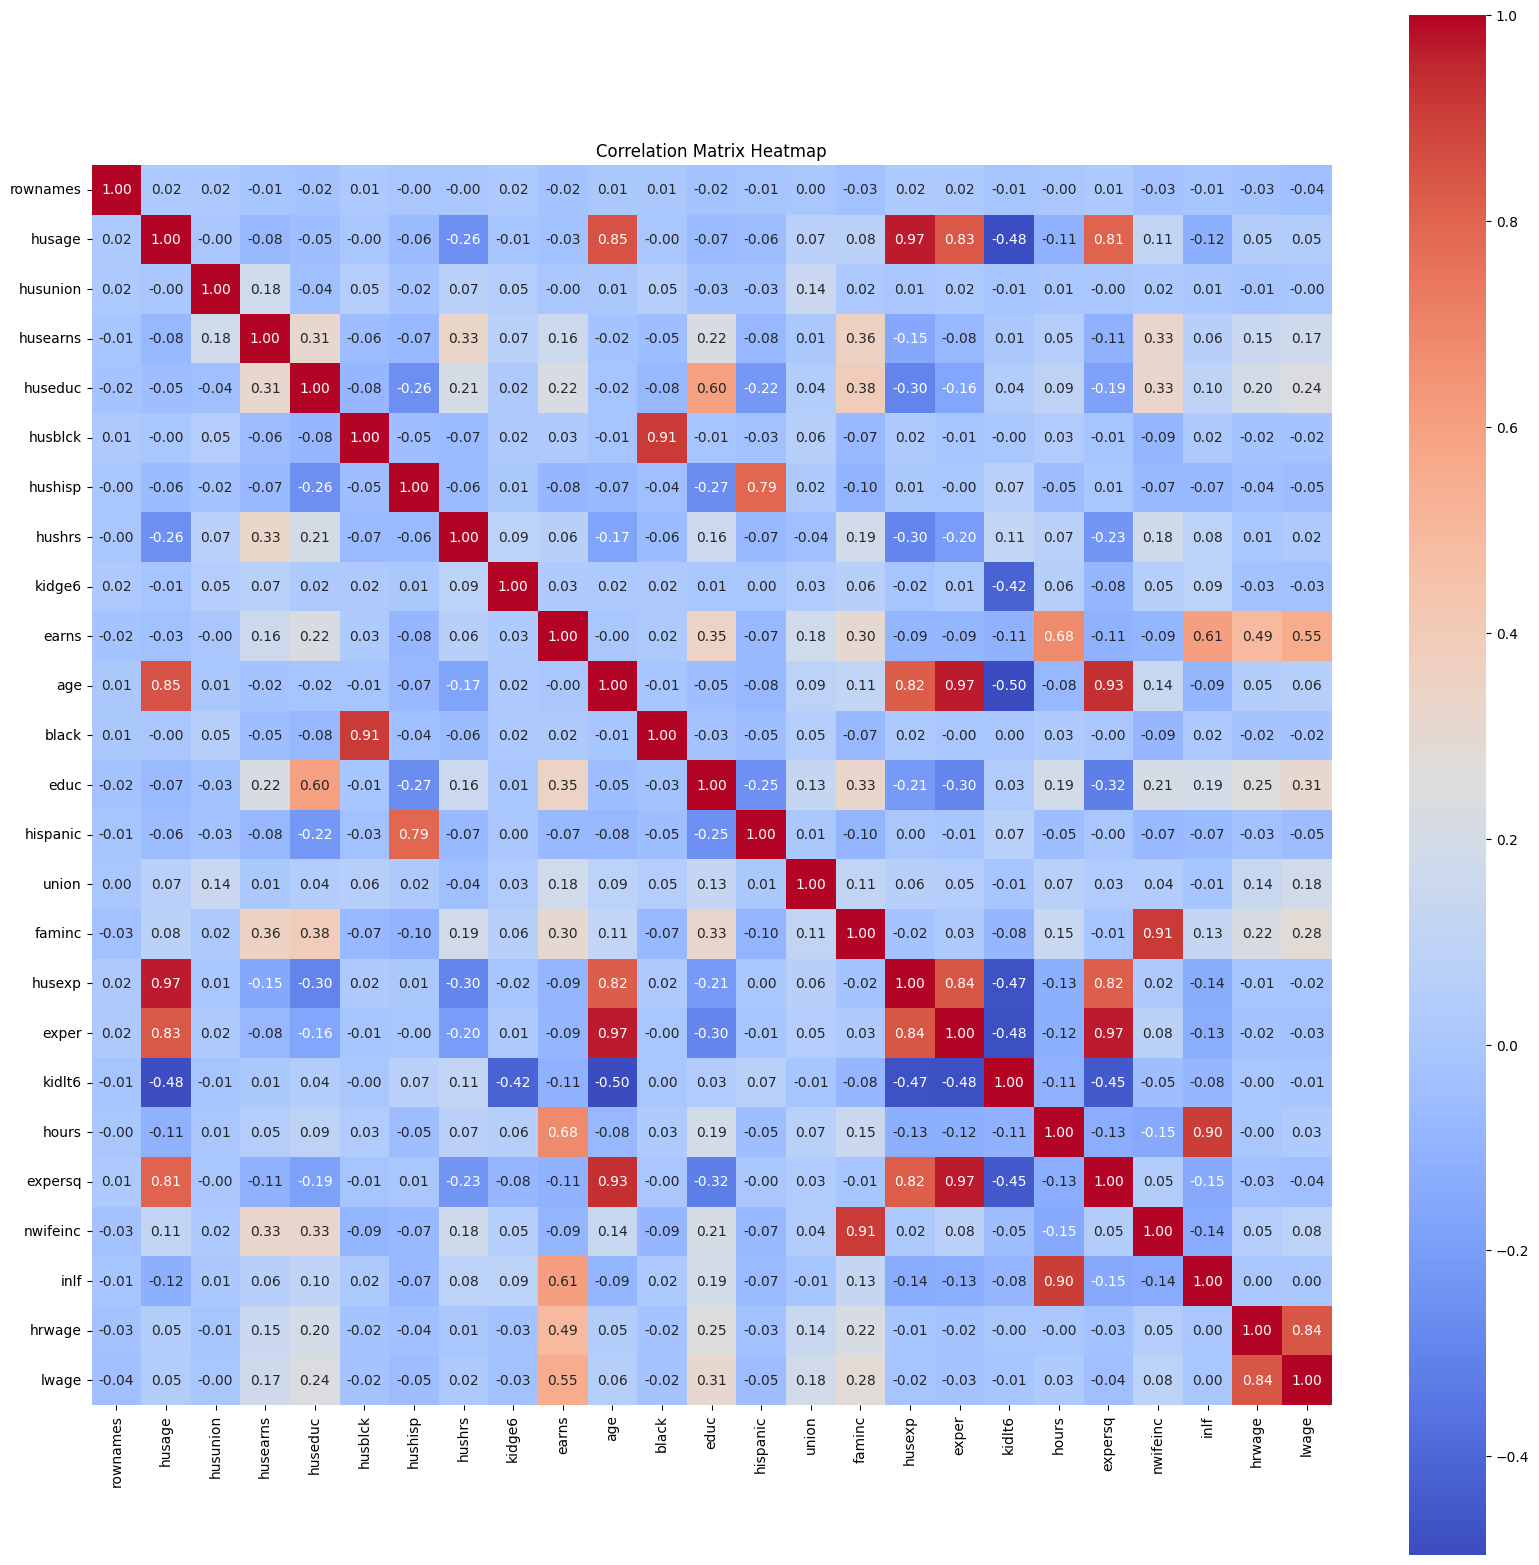

In [ ]:
# Srishti Sinha 21BDS0120

# Pairwise Correlation
# Select numeric columns for analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

print("\nn-D Statistical Analysis (Pairwise Correlation):")
print(correlation_matrix)

# Visualization of the Correlation Matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

6) Visualizations

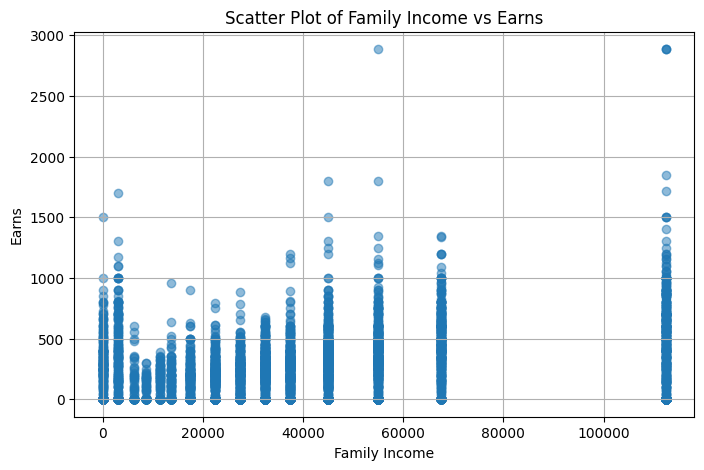

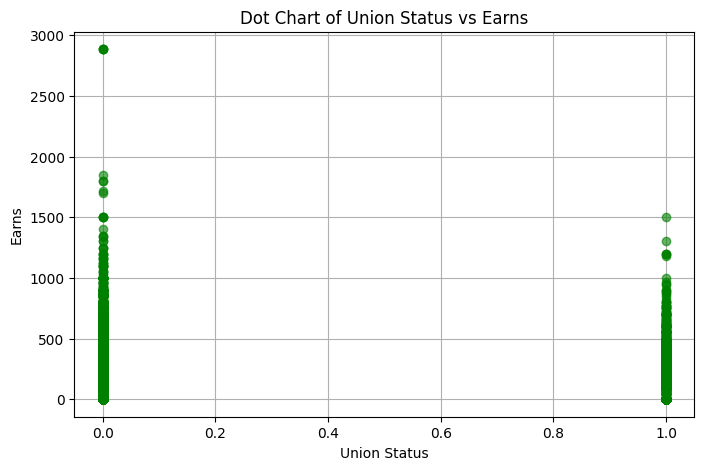

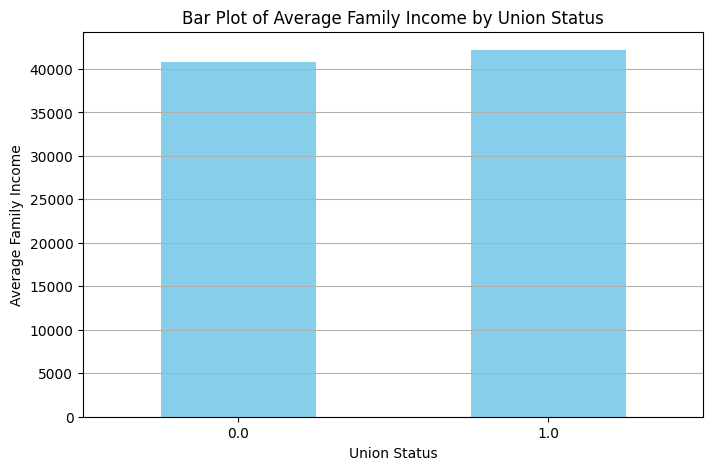

In [ ]:
# Srishti Sinha 21BDS0120


# Scatter Plot between 'faminc' and 'earns'
plt.figure(figsize=(8, 5))
plt.scatter(df['faminc'], df['earns'], alpha=0.5)
plt.title("Scatter Plot of Family Income vs Earns")
plt.xlabel("Family Income")
plt.ylabel("Earns")
plt.grid(True)
plt.show()

# Dot Chart for 'husunion' vs 'earns'
plt.figure(figsize=(8, 5))
plt.plot(df['husunion'], df['earns'], 'o', color='green', alpha=0.6)
plt.title("Dot Chart of Union Status vs Earns")
plt.xlabel("Union Status")
plt.ylabel("Earns")
plt.grid(True)
plt.show()

# Bar Plot showing the average 'faminc' by 'husunion' status
plt.figure(figsize=(8, 5))
avg_faminc_by_union = df.groupby('husunion')['faminc'].mean()
avg_faminc_by_union.plot(kind='bar', color='skyblue')
plt.title("Bar Plot of Average Family Income by Union Status")
plt.xlabel("Union Status")
plt.ylabel("Average Family Income")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##MODULE 5: Clustering Algorithms




In [ ]:
# Srishti Sinha 21BDS0120

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.cluster import DBSCAN

# Select relevant columns for clustering
X = df[['earns', 'hours', 'hrwage']]

**1) Spectral Clustering**

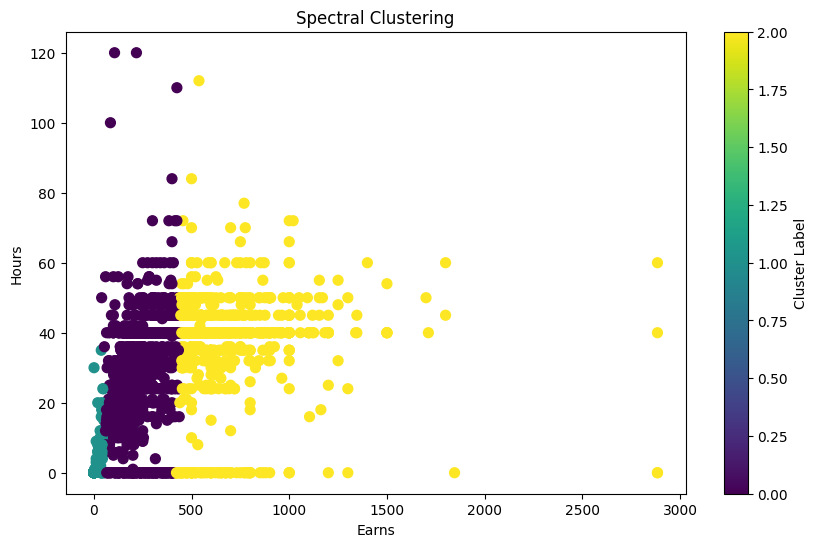

In [ ]:
# Srishti Sinha 21BDS0120

spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
df['spectral_cluster'] = spectral_clustering.fit_predict(X)

# Plot Spectral Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['spectral_cluster'], cmap='viridis', s=50)
plt.title('Spectral Clustering')
plt.xlabel('Earns')
plt.ylabel('Hours')
plt.colorbar(label='Cluster Label')
plt.show()

**2) K-Means**

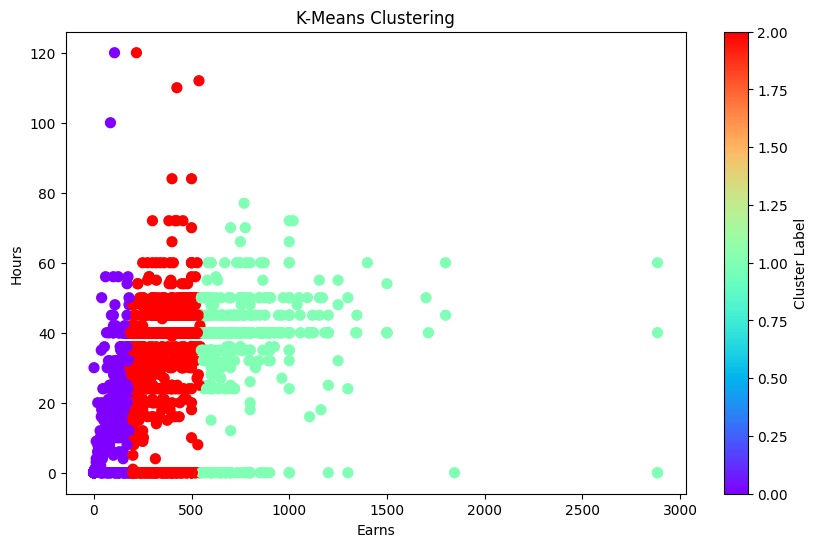

Cluster Centers:
[[ 30.80662393   5.52991453   9.28141367]
 [757.98913043  37.70341615  18.30930406]
 [337.82355637  35.26122823   9.42047389]]


In [ ]:
# Srishti Sinha 21BDS0120

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)

# Plot K-Means clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['kmeans_cluster'], cmap='rainbow', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Earns')
plt.ylabel('Hours')
plt.colorbar(label='Cluster Label')
plt.show()

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

**3) Minimum Spanning Tree**

In [ ]:
# Srishti Sinha 21BDS0120

dist_matrix = distance_matrix(X, X)
mst = minimum_spanning_tree(dist_matrix)
print("Minimum Spanning Tree Matrix:")
print(mst.toarray())

Minimum Spanning Tree Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**4) Model Based Clustering - Gaussian Mixture Model using Expectation-Maximization algorithm**

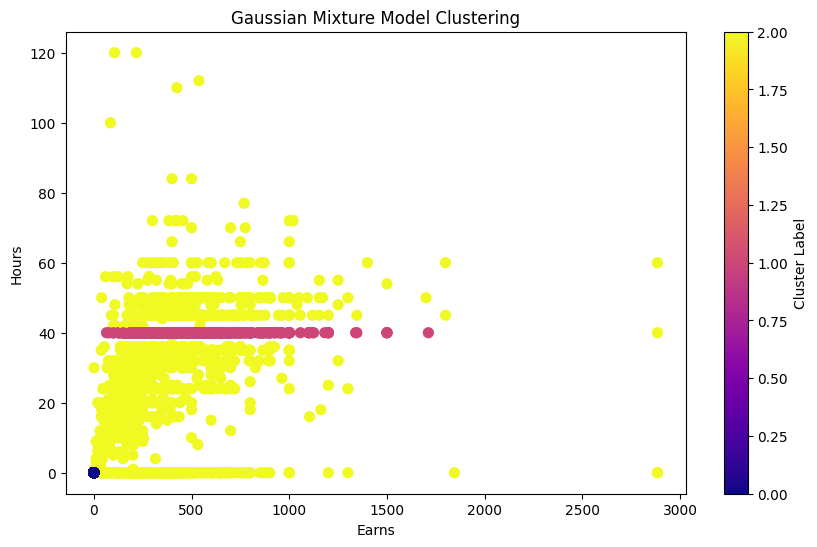

In [ ]:
# Srishti Sinha 21BDS0120

gmm = GaussianMixture(n_components=3)
df['gmm_cluster'] = gmm.fit_predict(X)

# Plot GMM Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['gmm_cluster'], cmap='plasma', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Earns')
plt.ylabel('Hours')
plt.colorbar(label='Cluster Label')
plt.show()

**5) Hierarchical Agglomerative Model - Based Clustering**

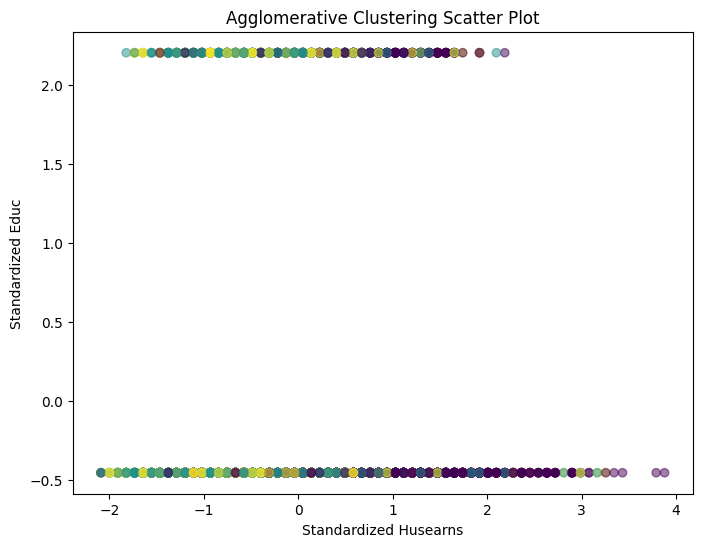

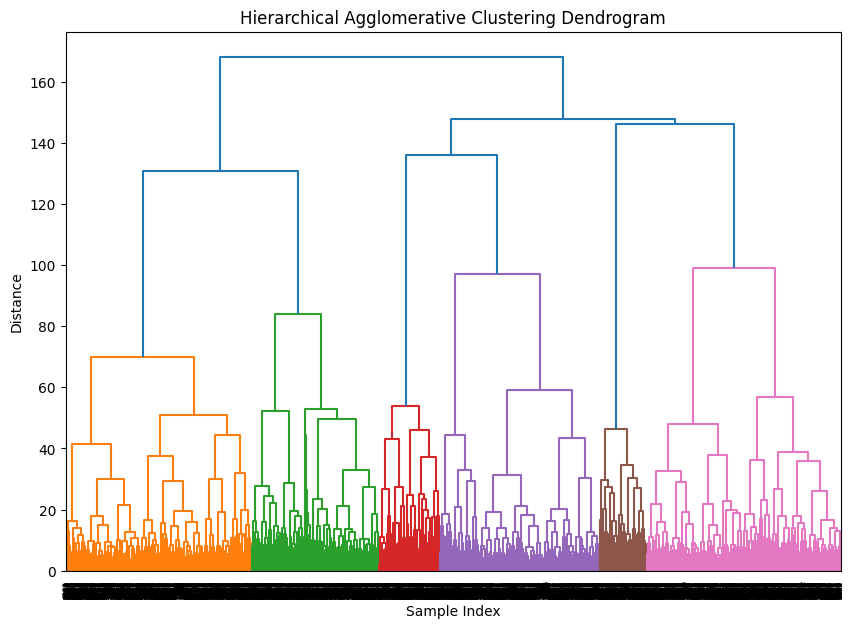

In [ ]:
# Srishti Sinha 21BDS0120

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

df = df.select_dtypes(include=[np.number])  # Exclude categorical columns

# Fill missing values in numeric columns with the median
df.fillna(df.median(), inplace=True)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data_scaled)

# Scatter Plot for Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 1], data_scaled[:, 2], c=agg_labels, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering Scatter Plot')
plt.xlabel('Standardized Husearns')
plt.ylabel('Standardized Educ')
plt.show()

# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

**6) Outlier Detection using Clustering**

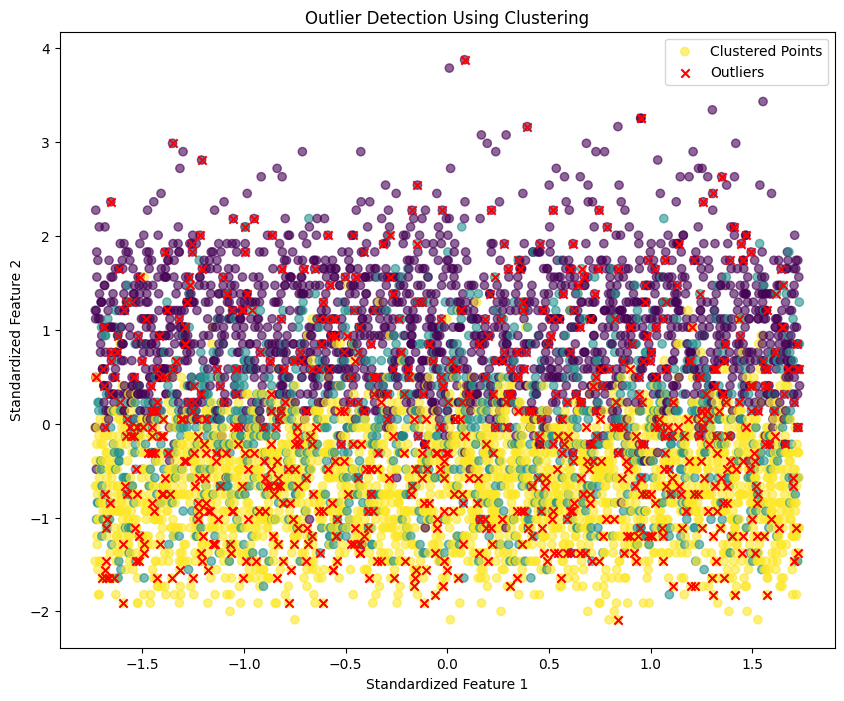

Outliers detected at indices: [   9   59   60   70   71   76   79   82   84   86   90   99  110  121
  122  126  129  131  153  158  175  182  189  200  221  226  234  242
  245  251  256  259  281  288  293  310  315  318  324  328  335  337
  345  348  349  360  375  380  389  395  406  422  444  448  451  456
  457  458  459  465  471  482  490  492  493  497  514  516  517  524
  534  538  542  544  547  556  557  562  577  580  596  613  620  626
  646  672  677  688  701  715  716  717  718  721  730  734  744  749
  763  773  779  780  785  788  792  795  797  813  820  822  825  828
  829  840  850  851  852  857  858  862  871  882  884  885  891  906
  907  916  941  954  963  966  968  972  981 1001 1002 1022 1031 1045
 1056 1083 1090 1098 1099 1100 1105 1108 1124 1130 1142 1144 1175 1177
 1183 1184 1197 1202 1203 1208 1213 1221 1222 1253 1272 1273 1285 1312
 1320 1346 1354 1357 1360 1375 1396 1400 1404 1405 1407 1408 1410 1419
 1426 1429 1446 1452 1453 1457 1462 1464 1474 1

In [ ]:
# Srishti Sinha 21BDS0120

kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

# Calculate the distance of each point to its closest cluster center
distances = kmeans.transform(data_scaled).min(axis=1)

# Determine outliers: define a threshold as 1.5 times the median distance
threshold = 1.5 * np.median(distances)
outliers = distances > threshold

# Plot the clustering results with outliers marked
plt.figure(figsize=(10, 8))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, label="Clustered Points")
plt.scatter(data_scaled[outliers, 0], data_scaled[outliers, 1], color='red', marker='x', label="Outliers")
plt.title('Outlier Detection Using Clustering')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.legend()
plt.show()

# Print out indices of the detected outliers
outlier_indices = np.where(outliers)[0]
print("Outliers detected at indices:", outlier_indices)

##MODULE 6: Dimensionality Reduction




In [ ]:
# Srishti Sinha 21BDS0120

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import MDS, Isomap
from minisom import MiniSom  # For Self-Organizing Maps

**1) Principal Component Analysis (PCA)**

Explained Variance Ratio by PCA Components: [0.18669384 0.14643251]


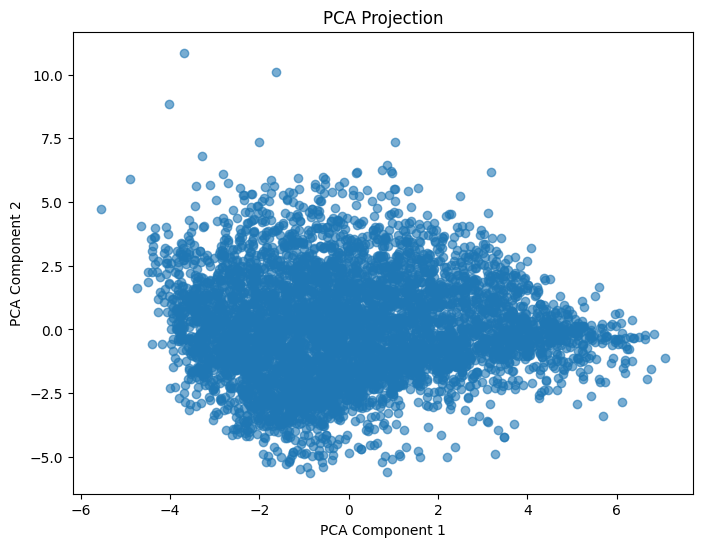

In [ ]:
# Srishti Sinha 21BDS0120

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
print("Explained Variance Ratio by PCA Components:", pca.explained_variance_ratio_)

# Plotting PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.6)
plt.title('PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**2) Singular Value Decomposition (SVD)**

Explained Variance by SVD Components: [0.18669384 0.14643251]


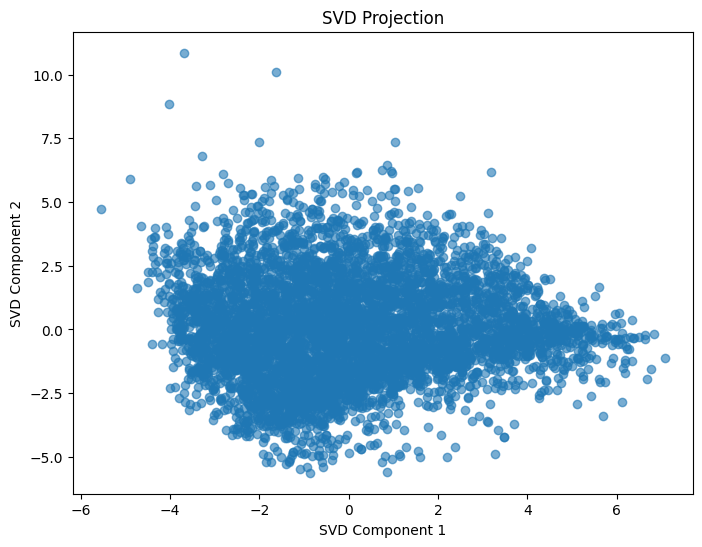

In [ ]:
# Srishti Sinha 21BDS0120

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(data_scaled)
print("Explained Variance by SVD Components:", svd.explained_variance_ratio_)

# Plotting SVD result
plt.figure(figsize=(8, 6))
plt.scatter(svd_data[:, 0], svd_data[:, 1], alpha=0.6)
plt.title('SVD Projection')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()

**3) Factor Analysis**

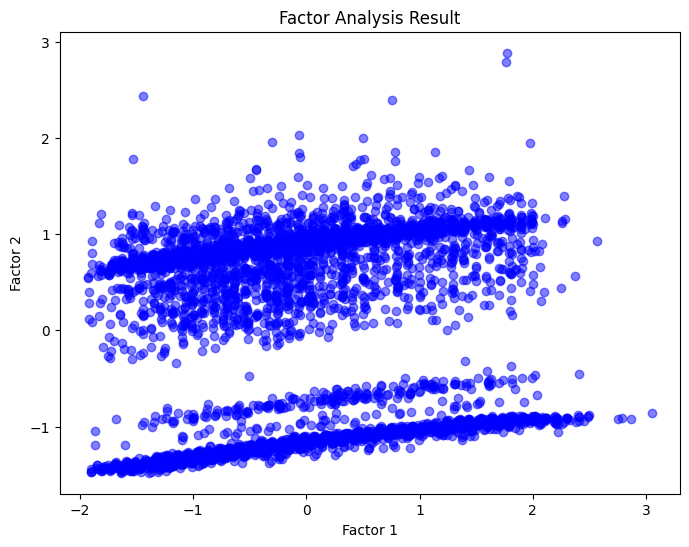

In [56]:
# Srishti Sinha 21BDS0120

from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis
factor_analysis = FactorAnalysis(n_components=2)
fa_components = factor_analysis.fit_transform(data_scaled)

# Plot Factor Analysis result
plt.figure(figsize=(8, 6))
plt.scatter(fa_components[:, 0], fa_components[:, 1], alpha=0.5, color='blue')
plt.title("Factor Analysis Result")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

**4) Intrinsic Dimensionality**

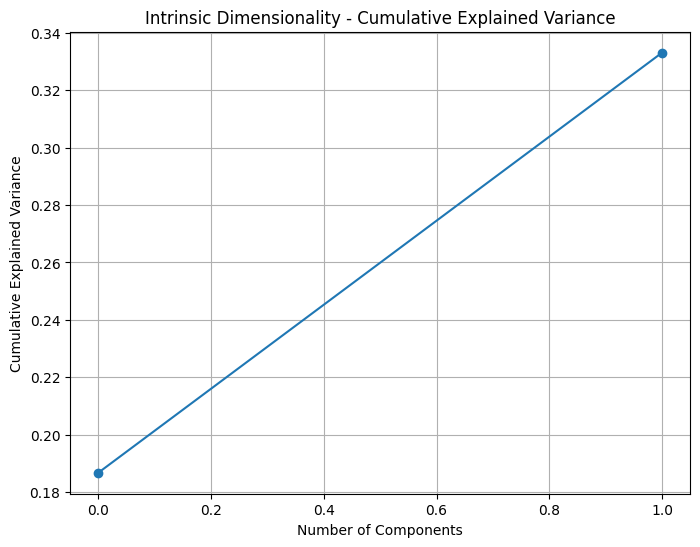

In [57]:
# Srishti Sinha 21BDS0120

# Cumulative explained variance to determine intrinsic dimensionality
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Intrinsic Dimensionality - Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

**5) Multidimensional Scaling (MDS)**

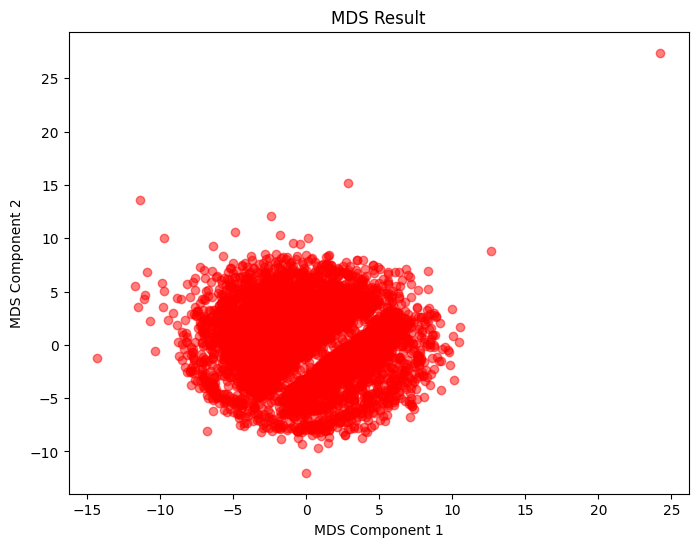

In [ ]:
# Srishti Sinha 21BDS0120

from sklearn.manifold import MDS

# Apply MDS
mds = MDS(n_components=2, random_state=0)
mds_components = mds.fit_transform(data_scaled)

# Plot MDS result
plt.figure(figsize=(8, 6))
plt.scatter(mds_components[:, 0], mds_components[:, 1], alpha=0.5, color='red')
plt.title("MDS Result")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.show()

**6) Manifold Learning**



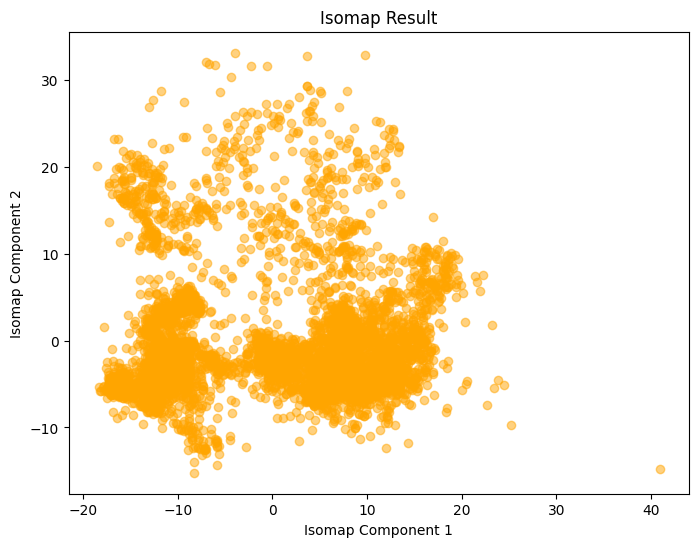

In [58]:
# Srishti Sinha 21BDS0120

from sklearn.manifold import Isomap

# Apply Isomap
isomap = Isomap(n_components=2)
isomap_components = isomap.fit_transform(data_scaled)

# Plot Isomap result
plt.figure(figsize=(8, 6))
plt.scatter(isomap_components[:, 0], isomap_components[:, 1], alpha=0.5, color='orange')
plt.title("Isomap Result")
plt.xlabel("Isomap Component 1")
plt.ylabel("Isomap Component 2")
plt.show()

**7) Self-Organizing Maps**

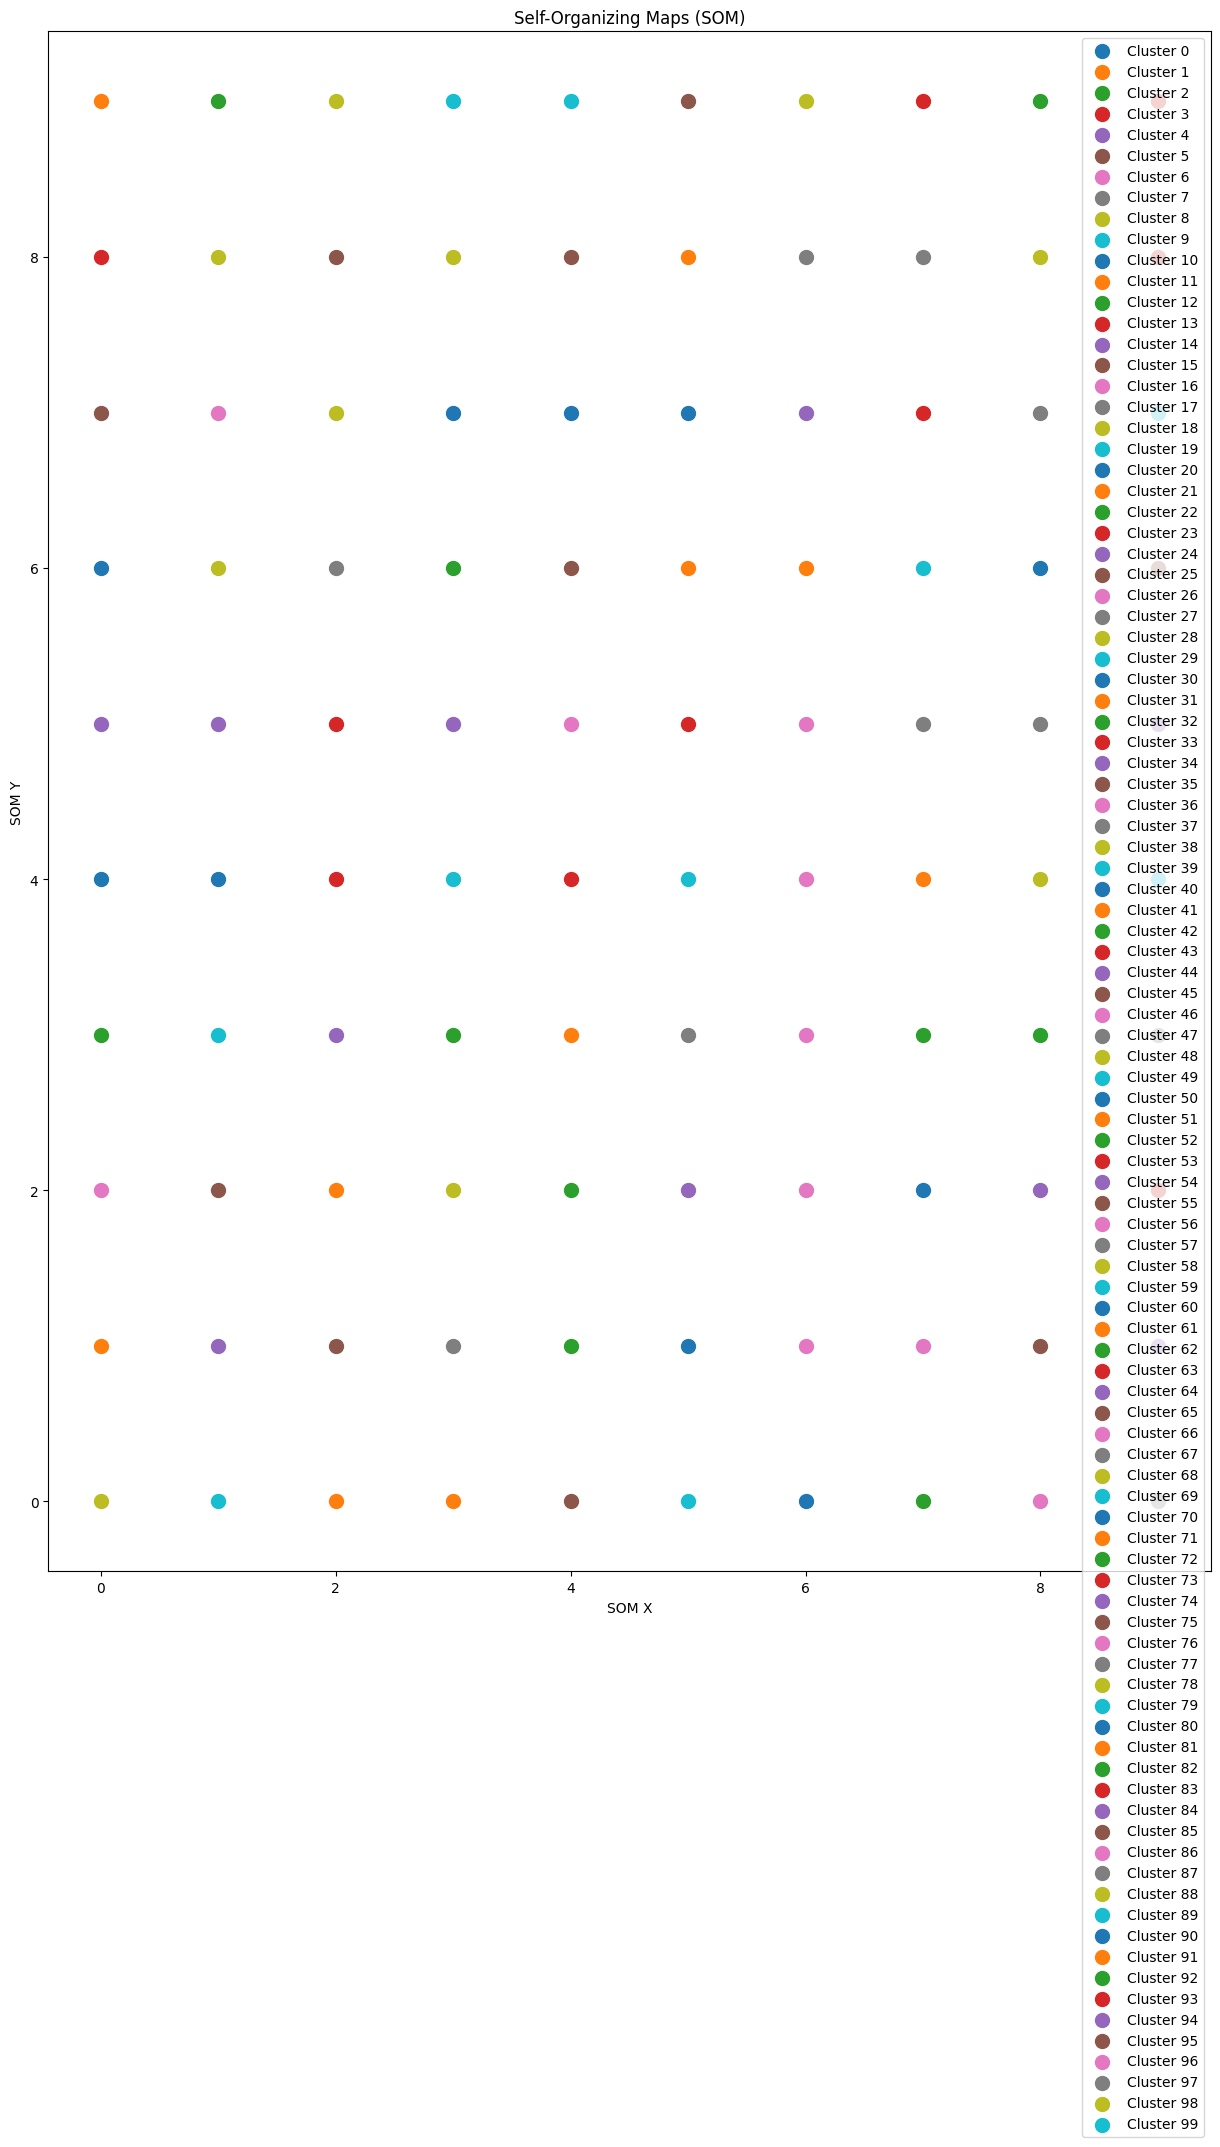

In [62]:
# Srishti Sinha 21BDS0120

# Define and train the SOM
som = MiniSom(x=10, y=10, input_len=data_scaled.shape[1], sigma=0.5, learning_rate=0.5)
som.random_weights_init(data_scaled)
som.train_random(data_scaled, 100)

# Visualize SOM results
plt.figure(figsize=(15, 20))
for i, (x, y) in enumerate(som.win_map(data_scaled).items()):
    plt.scatter([x[0]], [x[1]], s=100, label=f'Cluster {i}')
plt.title('Self-Organizing Maps (SOM)')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.legend()
plt.show()

##MODULE 7: Model Development and Evaluation

**Constructing linear regression model, evaluating, computing accuracy.**

Mean Squared Error: 111822.69401449291
Root Mean Squared Error: 334.3990042067902
R-squared: 0.2831098254094597


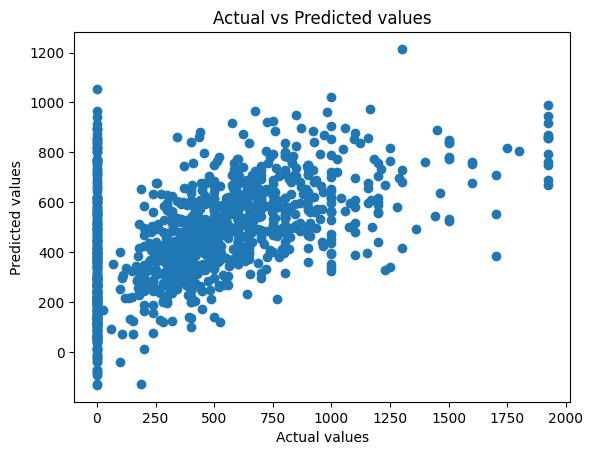

In [73]:
# Srishti Sinha 21BDS0120

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

df_numeric = df.select_dtypes(include=[np.number])

# Handle missing data by filling it with the median of each column
df_numeric.fillna(df_numeric.median(), inplace=True)

# we want to predict 'husearns' based on other features
X = df_numeric.drop('husearns', axis=1)  # Features
y = df_numeric['husearns']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()